# Scope of jupyter notebook
1. Data preperation steps
2. Fitting the model
3. Comparing the model performance with subset of data

In [1]:
import keras, os, pickle, ast
# import implicit
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from IPython.display import SVG
from keras.optimizers import Adam
from keras.layers import Dense,Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import CSVLogger
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.callbacks import ReduceLROnPlateau, History
from keras.regularizers import l1,l2
import seaborn as sns
sns.set()


Using TensorFlow backend.


In [2]:
rootPath = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

### Metrics (1 - bad, 10 - good)
Emotion - Mood gradient , normalized from 1 to 10

Headgaze - (RA Evidence) focus on front face (rather than side gaze) - normalized from 1 to 10

Motion - (RA Evidence) amount of motion over a span of 10 minutes - normalized from 1 to 10

handPose - number of times hand raised over a span of 10 minutes - normalized from score of 1 to 10

sleepPose - number of times in sleeping pose over a span of 10 minutes - normalized from a score of 1 to 10

In [3]:
df = pd.read_excel('EngagementTest2.xlsx')

#remove first column from importing excel
df = df.drop('Unnamed: 0', axis = 1)

In [8]:
#shuffle dataframe for randomness in splitting
df = df.sample(frac = 1)

In [9]:
df.head()

,Emotion,HeadGaze,Motion,handPose,sleepPose,Engagement
517,9,10,10,9,3,8
18,10,10,9,9,2,9
1131,5,7,7,6,6,6
111,10,8,8,8,2,8
127,8,9,8,9,1,10


In [13]:
#changing values to numpy array
X = df.iloc[:,:5].to_numpy()
Y = df.iloc[:,5:].to_numpy()

print(X.shape)
print(Y.shape)

(3000, 5)
(3000, 1)


In [14]:
#normalizing the data, will help with different ranges of values for different features
sc = StandardScaler()
values_scaled = sc.fit_transform(X)
scaled_df = pd.DataFrame(values_scaled)

scaled_df.head()

C:\Users\Gabriel Sze\Anaconda3\envs\tensorlearn\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Gabriel Sze\Anaconda3\envs\tensorlearn\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4
0,1.156379,1.499953,1.500401,1.171190,-0.840246
1,1.490206,1.499953,1.165266,1.171190,-1.175673
2,-0.178932,0.492898,0.494995,0.170553,0.166037
3,1.490206,0.828583,0.830130,0.837645,-1.175673
4,0.822551,1.164268,0.830130,1.171190,-1.511101


In [15]:
#apply one hot encoding to Y values
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

C:\Users\Gabriel Sze\Anaconda3\envs\tensorlearn\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [16]:
Y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#Split the dataset into x and y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2400, 5)
(600, 5)
(2400, 10)
(600, 10)


In [22]:
#Building the model, to train this we will build a simple 3 layer NN

def create_model():
    n_cols = X_train.shape[1]
    
    #batch normalization layers need to be added before relu activation
    model = keras.Sequential()
    model.add(Dense(50, activity_regularizer = l2(0.00001), input_shape = (n_cols,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
              
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(200))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation = 'softmax'))
    
    return model

In [23]:
#training the model
#test if the model has loss/accuracy problems
model = create_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

#adding callbacks
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 50, min_lr = 1e-5, verbose = 1)

history = History()

history = model.fit(X_train, Y_train,
                    validation_split = 0.4,
                    epochs = 1000,
                    batch_size = 64,
                    verbose = 2,
                    callbacks = [reduce_lr, history])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1440 samples, validate on 960 samples
Epoch 1/1000
 - 2s - loss: 3.0068 - categorical_accuracy: 0.1132 - val_loss: 2.2875 - val_categorical_accuracy: 0.2458
Epoch 2/1000
 - 0s - loss: 2.6118 - categorical_accuracy: 0.1819 - val_loss: 1.9941 - val_categorical_accuracy: 0.2656
Epoch 3/1000
 - 0s - loss: 2.2975 - categorical_accuracy: 0.2257 - val_loss: 1.7268 - val_categorical_accuracy: 0.2750
Epoch 4/1000
 - 0s - loss: 2.1416 - categorical_accuracy: 0.2451 - val_loss: 1.6026 - val_categorical_accuracy: 0.2719
Epoch 5/1000
 - 0s - loss: 1.9822 - categorical_accuracy: 0.2694 - val_loss: 1.5588 - val_categorical_accuracy: 0.2760
Epoch 6/1000
 - 0s - loss: 1.9133 - categorical_accuracy: 0.2736 - val_loss: 1.5452 - val_categorical_accuracy: 0.2802
Epoc

Epoch 61/1000
 - 0s - loss: 1.4388 - categorical_accuracy: 0.3042 - val_loss: 1.4318 - val_categorical_accuracy: 0.2677
Epoch 62/1000
 - 0s - loss: 1.4214 - categorical_accuracy: 0.2792 - val_loss: 1.4320 - val_categorical_accuracy: 0.3083
Epoch 63/1000
 - 0s - loss: 1.4582 - categorical_accuracy: 0.2722 - val_loss: 1.4229 - val_categorical_accuracy: 0.2604
Epoch 64/1000
 - 0s - loss: 1.4164 - categorical_accuracy: 0.3111 - val_loss: 1.4238 - val_categorical_accuracy: 0.2802
Epoch 65/1000
 - 0s - loss: 1.4062 - categorical_accuracy: 0.2889 - val_loss: 1.4215 - val_categorical_accuracy: 0.2792
Epoch 66/1000
 - 0s - loss: 1.4119 - categorical_accuracy: 0.3056 - val_loss: 1.4249 - val_categorical_accuracy: 0.2635
Epoch 67/1000
 - 0s - loss: 1.4422 - categorical_accuracy: 0.2757 - val_loss: 1.4296 - val_categorical_accuracy: 0.2667
Epoch 68/1000
 - 0s - loss: 1.4425 - categorical_accuracy: 0.2882 - val_loss: 1.4217 - val_categorical_accuracy: 0.2750
Epoch 69/1000
 - 0s - loss: 1.4409 - cat

 - 0s - loss: 1.3874 - categorical_accuracy: 0.2993 - val_loss: 1.3869 - val_categorical_accuracy: 0.2760
Epoch 130/1000
 - 0s - loss: 1.3665 - categorical_accuracy: 0.2833 - val_loss: 1.3887 - val_categorical_accuracy: 0.2667
Epoch 131/1000
 - 0s - loss: 1.3674 - categorical_accuracy: 0.2924 - val_loss: 1.3798 - val_categorical_accuracy: 0.3083
Epoch 132/1000
 - 0s - loss: 1.3601 - categorical_accuracy: 0.2931 - val_loss: 1.3946 - val_categorical_accuracy: 0.2781
Epoch 133/1000
 - 0s - loss: 1.3794 - categorical_accuracy: 0.2667 - val_loss: 1.3883 - val_categorical_accuracy: 0.2865
Epoch 134/1000
 - 0s - loss: 1.3904 - categorical_accuracy: 0.2903 - val_loss: 1.3980 - val_categorical_accuracy: 0.2656
Epoch 135/1000
 - 0s - loss: 1.3738 - categorical_accuracy: 0.2826 - val_loss: 1.3978 - val_categorical_accuracy: 0.2865
Epoch 136/1000
 - 0s - loss: 1.3692 - categorical_accuracy: 0.2917 - val_loss: 1.4057 - val_categorical_accuracy: 0.2823
Epoch 137/1000
 - 0s - loss: 1.3606 - categoric

Epoch 197/1000
 - 0s - loss: 1.3351 - categorical_accuracy: 0.3028 - val_loss: 1.3889 - val_categorical_accuracy: 0.2896
Epoch 198/1000
 - 0s - loss: 1.3590 - categorical_accuracy: 0.2958 - val_loss: 1.3926 - val_categorical_accuracy: 0.2656
Epoch 199/1000
 - 0s - loss: 1.3548 - categorical_accuracy: 0.3007 - val_loss: 1.3906 - val_categorical_accuracy: 0.3021
Epoch 200/1000
 - 0s - loss: 1.3569 - categorical_accuracy: 0.2882 - val_loss: 1.3956 - val_categorical_accuracy: 0.2625
Epoch 201/1000
 - 0s - loss: 1.3538 - categorical_accuracy: 0.2847 - val_loss: 1.3917 - val_categorical_accuracy: 0.2615
Epoch 202/1000
 - 0s - loss: 1.3510 - categorical_accuracy: 0.2986 - val_loss: 1.3841 - val_categorical_accuracy: 0.2667
Epoch 203/1000
 - 0s - loss: 1.3492 - categorical_accuracy: 0.3063 - val_loss: 1.3859 - val_categorical_accuracy: 0.2521
Epoch 204/1000
 - 0s - loss: 1.3317 - categorical_accuracy: 0.3139 - val_loss: 1.3809 - val_categorical_accuracy: 0.2667
Epoch 205/1000
 - 0s - loss: 1.3

 - 0s - loss: 1.3402 - categorical_accuracy: 0.2938 - val_loss: 1.3858 - val_categorical_accuracy: 0.2750
Epoch 265/1000
 - 0s - loss: 1.3256 - categorical_accuracy: 0.3201 - val_loss: 1.3878 - val_categorical_accuracy: 0.2615
Epoch 266/1000
 - 0s - loss: 1.3278 - categorical_accuracy: 0.2889 - val_loss: 1.3913 - val_categorical_accuracy: 0.2687
Epoch 267/1000
 - 0s - loss: 1.3453 - categorical_accuracy: 0.3056 - val_loss: 1.3916 - val_categorical_accuracy: 0.2656
Epoch 268/1000
 - 0s - loss: 1.3340 - categorical_accuracy: 0.2951 - val_loss: 1.3891 - val_categorical_accuracy: 0.2583
Epoch 269/1000
 - 0s - loss: 1.3616 - categorical_accuracy: 0.3174 - val_loss: 1.3902 - val_categorical_accuracy: 0.2750
Epoch 270/1000
 - 0s - loss: 1.3199 - categorical_accuracy: 0.3069 - val_loss: 1.3932 - val_categorical_accuracy: 0.2552
Epoch 271/1000
 - 0s - loss: 1.3118 - categorical_accuracy: 0.3014 - val_loss: 1.3914 - val_categorical_accuracy: 0.2469
Epoch 272/1000
 - 0s - loss: 1.3244 - categoric

Epoch 332/1000
 - 0s - loss: 1.3173 - categorical_accuracy: 0.3187 - val_loss: 1.3918 - val_categorical_accuracy: 0.2625
Epoch 333/1000
 - 0s - loss: 1.2949 - categorical_accuracy: 0.3139 - val_loss: 1.3920 - val_categorical_accuracy: 0.2750
Epoch 334/1000
 - 0s - loss: 1.3199 - categorical_accuracy: 0.2875 - val_loss: 1.3919 - val_categorical_accuracy: 0.2562
Epoch 335/1000
 - 0s - loss: 1.3124 - categorical_accuracy: 0.3222 - val_loss: 1.3915 - val_categorical_accuracy: 0.2615
Epoch 336/1000
 - 0s - loss: 1.3182 - categorical_accuracy: 0.3000 - val_loss: 1.3930 - val_categorical_accuracy: 0.2771
Epoch 337/1000
 - 0s - loss: 1.3273 - categorical_accuracy: 0.2986 - val_loss: 1.3941 - val_categorical_accuracy: 0.2521

Epoch 00337: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 338/1000
 - 0s - loss: 1.3388 - categorical_accuracy: 0.2938 - val_loss: 1.3941 - val_categorical_accuracy: 0.2625
Epoch 339/1000
 - 0s - loss: 1.3283 - categorical_accuracy: 0.2875 - val

Epoch 399/1000
 - 0s - loss: 1.3162 - categorical_accuracy: 0.3014 - val_loss: 1.3932 - val_categorical_accuracy: 0.2531
Epoch 400/1000
 - 0s - loss: 1.3012 - categorical_accuracy: 0.3264 - val_loss: 1.3936 - val_categorical_accuracy: 0.2573
Epoch 401/1000
 - 0s - loss: 1.3006 - categorical_accuracy: 0.3083 - val_loss: 1.3944 - val_categorical_accuracy: 0.2625
Epoch 402/1000
 - 0s - loss: 1.3252 - categorical_accuracy: 0.3271 - val_loss: 1.3947 - val_categorical_accuracy: 0.2635
Epoch 403/1000
 - 0s - loss: 1.3160 - categorical_accuracy: 0.3187 - val_loss: 1.3949 - val_categorical_accuracy: 0.2615
Epoch 404/1000
 - 0s - loss: 1.3244 - categorical_accuracy: 0.3187 - val_loss: 1.3963 - val_categorical_accuracy: 0.2625
Epoch 405/1000
 - 0s - loss: 1.3143 - categorical_accuracy: 0.3153 - val_loss: 1.3955 - val_categorical_accuracy: 0.2625
Epoch 406/1000
 - 0s - loss: 1.3163 - categorical_accuracy: 0.3125 - val_loss: 1.3950 - val_categorical_accuracy: 0.2562
Epoch 407/1000
 - 0s - loss: 1.3

Epoch 467/1000
 - 0s - loss: 1.3093 - categorical_accuracy: 0.3125 - val_loss: 1.3968 - val_categorical_accuracy: 0.2625
Epoch 468/1000
 - 0s - loss: 1.3122 - categorical_accuracy: 0.3215 - val_loss: 1.3968 - val_categorical_accuracy: 0.2625
Epoch 469/1000
 - 0s - loss: 1.3131 - categorical_accuracy: 0.3000 - val_loss: 1.3971 - val_categorical_accuracy: 0.2625
Epoch 470/1000
 - 0s - loss: 1.3039 - categorical_accuracy: 0.3021 - val_loss: 1.3976 - val_categorical_accuracy: 0.2625
Epoch 471/1000
 - 0s - loss: 1.3183 - categorical_accuracy: 0.3312 - val_loss: 1.3978 - val_categorical_accuracy: 0.2625
Epoch 472/1000
 - 0s - loss: 1.3147 - categorical_accuracy: 0.3014 - val_loss: 1.3977 - val_categorical_accuracy: 0.2625
Epoch 473/1000
 - 0s - loss: 1.3228 - categorical_accuracy: 0.3236 - val_loss: 1.3973 - val_categorical_accuracy: 0.2635
Epoch 474/1000
 - 0s - loss: 1.3154 - categorical_accuracy: 0.3201 - val_loss: 1.3974 - val_categorical_accuracy: 0.2615
Epoch 475/1000
 - 0s - loss: 1.3

 - 0s - loss: 1.3150 - categorical_accuracy: 0.3035 - val_loss: 1.3953 - val_categorical_accuracy: 0.2594
Epoch 535/1000
 - 0s - loss: 1.3087 - categorical_accuracy: 0.3076 - val_loss: 1.3954 - val_categorical_accuracy: 0.2625
Epoch 536/1000
 - 0s - loss: 1.3124 - categorical_accuracy: 0.2986 - val_loss: 1.3963 - val_categorical_accuracy: 0.2635
Epoch 537/1000
 - 0s - loss: 1.3068 - categorical_accuracy: 0.3264 - val_loss: 1.3965 - val_categorical_accuracy: 0.2625

Epoch 00537: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 538/1000
 - 0s - loss: 1.3083 - categorical_accuracy: 0.3160 - val_loss: 1.3971 - val_categorical_accuracy: 0.2625
Epoch 539/1000
 - 0s - loss: 1.3067 - categorical_accuracy: 0.3042 - val_loss: 1.3969 - val_categorical_accuracy: 0.2615
Epoch 540/1000
 - 0s - loss: 1.3057 - categorical_accuracy: 0.3194 - val_loss: 1.3967 - val_categorical_accuracy: 0.2615
Epoch 541/1000
 - 0s - loss: 1.3332 - categorical_accuracy: 0.3007 - val_loss: 1.3971 - val_categorical

Epoch 602/1000
 - 0s - loss: 1.3118 - categorical_accuracy: 0.3063 - val_loss: 1.3963 - val_categorical_accuracy: 0.2615
Epoch 603/1000
 - 0s - loss: 1.3096 - categorical_accuracy: 0.3215 - val_loss: 1.3964 - val_categorical_accuracy: 0.2594
Epoch 604/1000
 - 0s - loss: 1.3261 - categorical_accuracy: 0.3201 - val_loss: 1.3964 - val_categorical_accuracy: 0.2635
Epoch 605/1000
 - 0s - loss: 1.3072 - categorical_accuracy: 0.3104 - val_loss: 1.3968 - val_categorical_accuracy: 0.2615
Epoch 606/1000
 - 0s - loss: 1.3228 - categorical_accuracy: 0.3146 - val_loss: 1.3966 - val_categorical_accuracy: 0.2604
Epoch 607/1000
 - 0s - loss: 1.3178 - categorical_accuracy: 0.3285 - val_loss: 1.3963 - val_categorical_accuracy: 0.2604
Epoch 608/1000
 - 0s - loss: 1.3066 - categorical_accuracy: 0.3083 - val_loss: 1.3962 - val_categorical_accuracy: 0.2604
Epoch 609/1000
 - 0s - loss: 1.2993 - categorical_accuracy: 0.3118 - val_loss: 1.3962 - val_categorical_accuracy: 0.2594
Epoch 610/1000
 - 0s - loss: 1.3

Epoch 670/1000
 - 0s - loss: 1.3114 - categorical_accuracy: 0.3222 - val_loss: 1.3990 - val_categorical_accuracy: 0.2583
Epoch 671/1000
 - 0s - loss: 1.3124 - categorical_accuracy: 0.2896 - val_loss: 1.3984 - val_categorical_accuracy: 0.2604
Epoch 672/1000
 - 0s - loss: 1.3044 - categorical_accuracy: 0.3076 - val_loss: 1.3985 - val_categorical_accuracy: 0.2594
Epoch 673/1000
 - 0s - loss: 1.3104 - categorical_accuracy: 0.3028 - val_loss: 1.3983 - val_categorical_accuracy: 0.2594
Epoch 674/1000
 - 0s - loss: 1.3092 - categorical_accuracy: 0.3083 - val_loss: 1.3985 - val_categorical_accuracy: 0.2583
Epoch 675/1000
 - 0s - loss: 1.3203 - categorical_accuracy: 0.3056 - val_loss: 1.3983 - val_categorical_accuracy: 0.2583
Epoch 676/1000
 - 0s - loss: 1.3073 - categorical_accuracy: 0.3243 - val_loss: 1.3989 - val_categorical_accuracy: 0.2604
Epoch 677/1000
 - 0s - loss: 1.3066 - categorical_accuracy: 0.3125 - val_loss: 1.3985 - val_categorical_accuracy: 0.2583
Epoch 678/1000
 - 0s - loss: 1.2

Epoch 738/1000
 - 0s - loss: 1.3153 - categorical_accuracy: 0.3139 - val_loss: 1.3977 - val_categorical_accuracy: 0.2625
Epoch 739/1000
 - 0s - loss: 1.3152 - categorical_accuracy: 0.3132 - val_loss: 1.3976 - val_categorical_accuracy: 0.2635
Epoch 740/1000
 - 0s - loss: 1.3039 - categorical_accuracy: 0.3333 - val_loss: 1.3976 - val_categorical_accuracy: 0.2625
Epoch 741/1000
 - 0s - loss: 1.3179 - categorical_accuracy: 0.3292 - val_loss: 1.3979 - val_categorical_accuracy: 0.2615
Epoch 742/1000
 - 0s - loss: 1.3013 - categorical_accuracy: 0.3125 - val_loss: 1.3987 - val_categorical_accuracy: 0.2625
Epoch 743/1000
 - 0s - loss: 1.3071 - categorical_accuracy: 0.3278 - val_loss: 1.3987 - val_categorical_accuracy: 0.2625
Epoch 744/1000
 - 0s - loss: 1.3037 - categorical_accuracy: 0.3125 - val_loss: 1.3993 - val_categorical_accuracy: 0.2635
Epoch 745/1000
 - 0s - loss: 1.3103 - categorical_accuracy: 0.3229 - val_loss: 1.3994 - val_categorical_accuracy: 0.2625
Epoch 746/1000
 - 0s - loss: 1.3

Epoch 806/1000
 - 0s - loss: 1.3074 - categorical_accuracy: 0.3208 - val_loss: 1.3977 - val_categorical_accuracy: 0.2615
Epoch 807/1000
 - 0s - loss: 1.3168 - categorical_accuracy: 0.3139 - val_loss: 1.3973 - val_categorical_accuracy: 0.2615
Epoch 808/1000
 - 0s - loss: 1.3173 - categorical_accuracy: 0.3201 - val_loss: 1.3977 - val_categorical_accuracy: 0.2615
Epoch 809/1000
 - 0s - loss: 1.3026 - categorical_accuracy: 0.3250 - val_loss: 1.3979 - val_categorical_accuracy: 0.2615
Epoch 810/1000
 - 0s - loss: 1.3097 - categorical_accuracy: 0.3306 - val_loss: 1.3976 - val_categorical_accuracy: 0.2635
Epoch 811/1000
 - 0s - loss: 1.3189 - categorical_accuracy: 0.3160 - val_loss: 1.3983 - val_categorical_accuracy: 0.2625
Epoch 812/1000
 - 0s - loss: 1.3170 - categorical_accuracy: 0.3299 - val_loss: 1.3986 - val_categorical_accuracy: 0.2625
Epoch 813/1000
 - 0s - loss: 1.3266 - categorical_accuracy: 0.3083 - val_loss: 1.3988 - val_categorical_accuracy: 0.2625
Epoch 814/1000
 - 0s - loss: 1.2

Epoch 874/1000
 - 0s - loss: 1.3107 - categorical_accuracy: 0.3049 - val_loss: 1.3967 - val_categorical_accuracy: 0.2625
Epoch 875/1000
 - 0s - loss: 1.3063 - categorical_accuracy: 0.3181 - val_loss: 1.3969 - val_categorical_accuracy: 0.2625
Epoch 876/1000
 - 0s - loss: 1.3308 - categorical_accuracy: 0.3049 - val_loss: 1.3963 - val_categorical_accuracy: 0.2635
Epoch 877/1000
 - 0s - loss: 1.3155 - categorical_accuracy: 0.3132 - val_loss: 1.3963 - val_categorical_accuracy: 0.2635
Epoch 878/1000
 - 0s - loss: 1.3040 - categorical_accuracy: 0.3049 - val_loss: 1.3967 - val_categorical_accuracy: 0.2635
Epoch 879/1000
 - 0s - loss: 1.3211 - categorical_accuracy: 0.3208 - val_loss: 1.3966 - val_categorical_accuracy: 0.2583
Epoch 880/1000
 - 0s - loss: 1.3167 - categorical_accuracy: 0.3194 - val_loss: 1.3962 - val_categorical_accuracy: 0.2594
Epoch 881/1000
 - 0s - loss: 1.3068 - categorical_accuracy: 0.3243 - val_loss: 1.3963 - val_categorical_accuracy: 0.2594
Epoch 882/1000
 - 0s - loss: 1.3

Epoch 942/1000
 - 0s - loss: 1.3088 - categorical_accuracy: 0.3250 - val_loss: 1.3988 - val_categorical_accuracy: 0.2635
Epoch 943/1000
 - 0s - loss: 1.3062 - categorical_accuracy: 0.3014 - val_loss: 1.3982 - val_categorical_accuracy: 0.2625
Epoch 944/1000
 - 0s - loss: 1.3113 - categorical_accuracy: 0.3007 - val_loss: 1.3990 - val_categorical_accuracy: 0.2625
Epoch 945/1000
 - 0s - loss: 1.3080 - categorical_accuracy: 0.3146 - val_loss: 1.3988 - val_categorical_accuracy: 0.2625
Epoch 946/1000
 - 0s - loss: 1.3271 - categorical_accuracy: 0.2965 - val_loss: 1.3990 - val_categorical_accuracy: 0.2635
Epoch 947/1000
 - 0s - loss: 1.3192 - categorical_accuracy: 0.3069 - val_loss: 1.3979 - val_categorical_accuracy: 0.2615
Epoch 948/1000
 - 0s - loss: 1.3148 - categorical_accuracy: 0.3229 - val_loss: 1.3979 - val_categorical_accuracy: 0.2625
Epoch 949/1000
 - 0s - loss: 1.3186 - categorical_accuracy: 0.3021 - val_loss: 1.3981 - val_categorical_accuracy: 0.2625
Epoch 950/1000
 - 0s - loss: 1.3

### Comparing the effects of training the model on various subsamples of the data

In [80]:
result_dict = {}
subset_data_list = [0.2, 0.4, 0.6, 0.8]

for subset_data in subset_data_list:
    #training the model on a proportion of data and save the loss and accuracy
    
    model = create_model()
    model.compile(optimizer = Adam(lr = 0.00003), loss = 'categorical_crossentropy',
                  metrics = ['categorical_accuracy'])
    
    #adding callbacks
    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.5,
                                  patience=20, min_lr=1e-7, verbose = 1)
    history = History()
    logger = CSVLogger(os.path.join(rootPath, 'logs', 'log_results-{}.csv'.format(subset_data)))
    
    #training the model with subset of data
    history = model.fit(X_train, Y_train,
                        validation_split = 1 - subset_data,
                        epochs = 1000,
                        verbose = 2,
                        callbacks = [reduce_lr, history, logger])
    
    result_dict[subset_data] = {
        'training_loss' : history.history['loss'],
        'validation_loss': history.history['val_loss'],
        'training_accuracy': history.history['categorical_accuracy'],
        'validation_accuracy': history.history['val_categorical_accuracy']
    }

Train on 479 samples, validate on 1921 samples
Epoch 1/1000
 - 13s - loss: 3.1102 - categorical_accuracy: 0.0960 - val_loss: 2.4397 - val_categorical_accuracy: 0.1015
Epoch 2/1000
 - 0s - loss: 3.1450 - categorical_accuracy: 0.1086 - val_loss: 2.4445 - val_categorical_accuracy: 0.0963
Epoch 3/1000
 - 0s - loss: 3.1427 - categorical_accuracy: 0.1044 - val_loss: 2.4442 - val_categorical_accuracy: 0.0999
Epoch 4/1000
 - 1s - loss: 3.1176 - categorical_accuracy: 0.1044 - val_loss: 2.4392 - val_categorical_accuracy: 0.1119
Epoch 5/1000
 - 0s - loss: 3.1249 - categorical_accuracy: 0.0835 - val_loss: 2.4377 - val_categorical_accuracy: 0.1124
Epoch 6/1000
 - 0s - loss: 2.9884 - categorical_accuracy: 0.1315 - val_loss: 2.4343 - val_categorical_accuracy: 0.1109
Epoch 7/1000
 - 1s - loss: 3.1295 - categorical_accuracy: 0.1044 - val_loss: 2.4295 - val_categorical_accuracy: 0.1119
Epoch 8/1000
 - 1s - loss: 3.0188 - categorical_accuracy: 0.0981 - val_loss: 2.4283 - val_categorical_accuracy: 0.1156


Epoch 69/1000
 - 0s - loss: 2.6206 - categorical_accuracy: 0.1461 - val_loss: 2.2764 - val_categorical_accuracy: 0.1296
Epoch 70/1000
 - 0s - loss: 2.6909 - categorical_accuracy: 0.1587 - val_loss: 2.2722 - val_categorical_accuracy: 0.1312
Epoch 71/1000
 - 0s - loss: 2.6124 - categorical_accuracy: 0.1712 - val_loss: 2.2704 - val_categorical_accuracy: 0.1255
Epoch 72/1000
 - 0s - loss: 2.6282 - categorical_accuracy: 0.1837 - val_loss: 2.2678 - val_categorical_accuracy: 0.1275
Epoch 73/1000
 - 0s - loss: 2.6948 - categorical_accuracy: 0.1482 - val_loss: 2.2618 - val_categorical_accuracy: 0.1291
Epoch 74/1000
 - 0s - loss: 2.6111 - categorical_accuracy: 0.1754 - val_loss: 2.2590 - val_categorical_accuracy: 0.1307
Epoch 75/1000
 - 0s - loss: 2.6133 - categorical_accuracy: 0.1795 - val_loss: 2.2546 - val_categorical_accuracy: 0.1312
Epoch 76/1000
 - 0s - loss: 2.6866 - categorical_accuracy: 0.1357 - val_loss: 2.2507 - val_categorical_accuracy: 0.1291
Epoch 77/1000
 - 0s - loss: 2.6774 - cat

Epoch 137/1000
 - 0s - loss: 2.3763 - categorical_accuracy: 0.1962 - val_loss: 2.0617 - val_categorical_accuracy: 0.2020
Epoch 138/1000
 - 0s - loss: 2.2677 - categorical_accuracy: 0.2213 - val_loss: 2.0580 - val_categorical_accuracy: 0.2061
Epoch 139/1000
 - 0s - loss: 2.3666 - categorical_accuracy: 0.2088 - val_loss: 2.0544 - val_categorical_accuracy: 0.2103
Epoch 140/1000
 - 0s - loss: 2.3809 - categorical_accuracy: 0.1754 - val_loss: 2.0527 - val_categorical_accuracy: 0.2129
Epoch 141/1000
 - 0s - loss: 2.3913 - categorical_accuracy: 0.2192 - val_loss: 2.0494 - val_categorical_accuracy: 0.2150
Epoch 142/1000
 - 0s - loss: 2.3058 - categorical_accuracy: 0.2401 - val_loss: 2.0458 - val_categorical_accuracy: 0.2150
Epoch 143/1000
 - 0s - loss: 2.4243 - categorical_accuracy: 0.1816 - val_loss: 2.0449 - val_categorical_accuracy: 0.2160
Epoch 144/1000
 - 0s - loss: 2.3892 - categorical_accuracy: 0.2213 - val_loss: 2.0434 - val_categorical_accuracy: 0.2181
Epoch 145/1000
 - 0s - loss: 2.3

Epoch 205/1000
 - 0s - loss: 2.1524 - categorical_accuracy: 0.2359 - val_loss: 1.8717 - val_categorical_accuracy: 0.2488
Epoch 206/1000
 - 0s - loss: 2.1830 - categorical_accuracy: 0.2276 - val_loss: 1.8663 - val_categorical_accuracy: 0.2473
Epoch 207/1000
 - 0s - loss: 2.0902 - categorical_accuracy: 0.2797 - val_loss: 1.8678 - val_categorical_accuracy: 0.2431
Epoch 208/1000
 - 0s - loss: 2.2000 - categorical_accuracy: 0.2234 - val_loss: 1.8660 - val_categorical_accuracy: 0.2478
Epoch 209/1000
 - 0s - loss: 2.2667 - categorical_accuracy: 0.2109 - val_loss: 1.8615 - val_categorical_accuracy: 0.2452
Epoch 210/1000
 - 0s - loss: 2.1494 - categorical_accuracy: 0.2422 - val_loss: 1.8606 - val_categorical_accuracy: 0.2473
Epoch 211/1000
 - 0s - loss: 2.1267 - categorical_accuracy: 0.2568 - val_loss: 1.8589 - val_categorical_accuracy: 0.2499
Epoch 212/1000
 - 0s - loss: 2.0348 - categorical_accuracy: 0.2651 - val_loss: 1.8599 - val_categorical_accuracy: 0.2514
Epoch 213/1000
 - 0s - loss: 2.1

Epoch 273/1000
 - 0s - loss: 2.0140 - categorical_accuracy: 0.2630 - val_loss: 1.7393 - val_categorical_accuracy: 0.2624
Epoch 274/1000
 - 0s - loss: 2.0634 - categorical_accuracy: 0.2276 - val_loss: 1.7361 - val_categorical_accuracy: 0.2650
Epoch 275/1000
 - 0s - loss: 2.0574 - categorical_accuracy: 0.2276 - val_loss: 1.7320 - val_categorical_accuracy: 0.2676
Epoch 276/1000
 - 0s - loss: 2.0338 - categorical_accuracy: 0.2610 - val_loss: 1.7312 - val_categorical_accuracy: 0.2629
Epoch 277/1000
 - 0s - loss: 1.8765 - categorical_accuracy: 0.3090 - val_loss: 1.7338 - val_categorical_accuracy: 0.2655
Epoch 278/1000
 - 0s - loss: 2.0521 - categorical_accuracy: 0.2401 - val_loss: 1.7300 - val_categorical_accuracy: 0.2681
Epoch 279/1000
 - 0s - loss: 2.0725 - categorical_accuracy: 0.2171 - val_loss: 1.7295 - val_categorical_accuracy: 0.2644
Epoch 280/1000
 - 0s - loss: 2.0027 - categorical_accuracy: 0.2756 - val_loss: 1.7318 - val_categorical_accuracy: 0.2665
Epoch 281/1000
 - 0s - loss: 1.9

Epoch 341/1000
 - 0s - loss: 1.9613 - categorical_accuracy: 0.2463 - val_loss: 1.6629 - val_categorical_accuracy: 0.2728
Epoch 342/1000
 - 0s - loss: 1.9522 - categorical_accuracy: 0.2296 - val_loss: 1.6594 - val_categorical_accuracy: 0.2717
Epoch 343/1000
 - 0s - loss: 2.0285 - categorical_accuracy: 0.2380 - val_loss: 1.6582 - val_categorical_accuracy: 0.2728
Epoch 344/1000
 - 0s - loss: 1.8780 - categorical_accuracy: 0.2923 - val_loss: 1.6615 - val_categorical_accuracy: 0.2702
Epoch 345/1000
 - 0s - loss: 1.9805 - categorical_accuracy: 0.2380 - val_loss: 1.6611 - val_categorical_accuracy: 0.2670
Epoch 346/1000
 - 0s - loss: 1.9353 - categorical_accuracy: 0.2359 - val_loss: 1.6618 - val_categorical_accuracy: 0.2691
Epoch 347/1000
 - 0s - loss: 1.8935 - categorical_accuracy: 0.2777 - val_loss: 1.6585 - val_categorical_accuracy: 0.2686
Epoch 348/1000
 - 0s - loss: 1.9221 - categorical_accuracy: 0.2651 - val_loss: 1.6525 - val_categorical_accuracy: 0.2717
Epoch 349/1000
 - 0s - loss: 1.9

Epoch 409/1000
 - 0s - loss: 1.8517 - categorical_accuracy: 0.2672 - val_loss: 1.5942 - val_categorical_accuracy: 0.2717
Epoch 410/1000
 - 0s - loss: 1.9285 - categorical_accuracy: 0.2443 - val_loss: 1.5963 - val_categorical_accuracy: 0.2697
Epoch 411/1000
 - 0s - loss: 1.8383 - categorical_accuracy: 0.3090 - val_loss: 1.5952 - val_categorical_accuracy: 0.2697
Epoch 412/1000
 - 0s - loss: 1.8445 - categorical_accuracy: 0.2505 - val_loss: 1.5965 - val_categorical_accuracy: 0.2697
Epoch 413/1000
 - 0s - loss: 1.8067 - categorical_accuracy: 0.2860 - val_loss: 1.5951 - val_categorical_accuracy: 0.2712
Epoch 414/1000
 - 0s - loss: 1.8730 - categorical_accuracy: 0.2568 - val_loss: 1.5930 - val_categorical_accuracy: 0.2712
Epoch 415/1000
 - 0s - loss: 1.9308 - categorical_accuracy: 0.2526 - val_loss: 1.5941 - val_categorical_accuracy: 0.2707
Epoch 416/1000
 - 0s - loss: 1.9067 - categorical_accuracy: 0.2714 - val_loss: 1.5912 - val_categorical_accuracy: 0.2738
Epoch 417/1000
 - 0s - loss: 1.8

Epoch 477/1000
 - 0s - loss: 1.7575 - categorical_accuracy: 0.2985 - val_loss: 1.5537 - val_categorical_accuracy: 0.2743
Epoch 478/1000
 - 0s - loss: 1.8070 - categorical_accuracy: 0.2526 - val_loss: 1.5545 - val_categorical_accuracy: 0.2738
Epoch 479/1000
 - 0s - loss: 1.7565 - categorical_accuracy: 0.2839 - val_loss: 1.5564 - val_categorical_accuracy: 0.2743
Epoch 480/1000
 - 0s - loss: 1.8234 - categorical_accuracy: 0.2443 - val_loss: 1.5570 - val_categorical_accuracy: 0.2749
Epoch 481/1000
 - 0s - loss: 1.8328 - categorical_accuracy: 0.2630 - val_loss: 1.5557 - val_categorical_accuracy: 0.2754
Epoch 482/1000
 - 0s - loss: 1.8531 - categorical_accuracy: 0.2881 - val_loss: 1.5530 - val_categorical_accuracy: 0.2743
Epoch 483/1000
 - 0s - loss: 1.8058 - categorical_accuracy: 0.2651 - val_loss: 1.5524 - val_categorical_accuracy: 0.2743
Epoch 484/1000
 - 0s - loss: 1.8249 - categorical_accuracy: 0.2589 - val_loss: 1.5516 - val_categorical_accuracy: 0.2717
Epoch 485/1000
 - 0s - loss: 1.7

Epoch 545/1000
 - 0s - loss: 1.6995 - categorical_accuracy: 0.2568 - val_loss: 1.5247 - val_categorical_accuracy: 0.2775
Epoch 546/1000
 - 0s - loss: 1.8131 - categorical_accuracy: 0.2505 - val_loss: 1.5261 - val_categorical_accuracy: 0.2733
Epoch 547/1000
 - 0s - loss: 1.6998 - categorical_accuracy: 0.2610 - val_loss: 1.5285 - val_categorical_accuracy: 0.2743
Epoch 548/1000
 - 0s - loss: 1.7437 - categorical_accuracy: 0.2797 - val_loss: 1.5289 - val_categorical_accuracy: 0.2743
Epoch 549/1000
 - 0s - loss: 1.7804 - categorical_accuracy: 0.2505 - val_loss: 1.5293 - val_categorical_accuracy: 0.2749
Epoch 550/1000
 - 0s - loss: 1.7584 - categorical_accuracy: 0.2818 - val_loss: 1.5282 - val_categorical_accuracy: 0.2743
Epoch 551/1000
 - 0s - loss: 1.7979 - categorical_accuracy: 0.2693 - val_loss: 1.5278 - val_categorical_accuracy: 0.2738
Epoch 552/1000
 - 0s - loss: 1.7615 - categorical_accuracy: 0.2630 - val_loss: 1.5264 - val_categorical_accuracy: 0.2738
Epoch 553/1000
 - 0s - loss: 1.7

Epoch 613/1000
 - 0s - loss: 1.7097 - categorical_accuracy: 0.3090 - val_loss: 1.5080 - val_categorical_accuracy: 0.2754
Epoch 614/1000
 - 0s - loss: 1.6780 - categorical_accuracy: 0.2484 - val_loss: 1.5069 - val_categorical_accuracy: 0.2754
Epoch 615/1000
 - 0s - loss: 1.7653 - categorical_accuracy: 0.2610 - val_loss: 1.5076 - val_categorical_accuracy: 0.2728
Epoch 616/1000
 - 0s - loss: 1.6663 - categorical_accuracy: 0.3132 - val_loss: 1.5088 - val_categorical_accuracy: 0.2749
Epoch 617/1000
 - 0s - loss: 1.6648 - categorical_accuracy: 0.2839 - val_loss: 1.5095 - val_categorical_accuracy: 0.2769
Epoch 618/1000
 - 0s - loss: 1.6867 - categorical_accuracy: 0.2672 - val_loss: 1.5080 - val_categorical_accuracy: 0.2764
Epoch 619/1000
 - 0s - loss: 1.6996 - categorical_accuracy: 0.2443 - val_loss: 1.5080 - val_categorical_accuracy: 0.2764
Epoch 620/1000
 - 0s - loss: 1.6946 - categorical_accuracy: 0.3132 - val_loss: 1.5050 - val_categorical_accuracy: 0.2749
Epoch 621/1000
 - 0s - loss: 1.7

Epoch 681/1000
 - 0s - loss: 1.7389 - categorical_accuracy: 0.2902 - val_loss: 1.4994 - val_categorical_accuracy: 0.2697
Epoch 682/1000
 - 0s - loss: 1.6980 - categorical_accuracy: 0.3006 - val_loss: 1.5001 - val_categorical_accuracy: 0.2697
Epoch 683/1000
 - 0s - loss: 1.7589 - categorical_accuracy: 0.2589 - val_loss: 1.4997 - val_categorical_accuracy: 0.2697
Epoch 684/1000
 - 0s - loss: 1.6725 - categorical_accuracy: 0.2839 - val_loss: 1.5000 - val_categorical_accuracy: 0.2676
Epoch 685/1000
 - 0s - loss: 1.7128 - categorical_accuracy: 0.2672 - val_loss: 1.5004 - val_categorical_accuracy: 0.2676
Epoch 686/1000
 - 0s - loss: 1.6676 - categorical_accuracy: 0.2756 - val_loss: 1.4984 - val_categorical_accuracy: 0.2676
Epoch 687/1000
 - 0s - loss: 1.6390 - categorical_accuracy: 0.2777 - val_loss: 1.4967 - val_categorical_accuracy: 0.2676
Epoch 688/1000
 - 0s - loss: 1.6159 - categorical_accuracy: 0.3152 - val_loss: 1.4954 - val_categorical_accuracy: 0.2676

Epoch 00688: ReduceLROnPlateau 

 - 0s - loss: 1.7085 - categorical_accuracy: 0.2610 - val_loss: 1.4887 - val_categorical_accuracy: 0.2691

Epoch 00748: ReduceLROnPlateau reducing learning rate to 7.499999810534064e-06.
Epoch 749/1000
 - 0s - loss: 1.7089 - categorical_accuracy: 0.2902 - val_loss: 1.4895 - val_categorical_accuracy: 0.2691
Epoch 750/1000
 - 0s - loss: 1.6200 - categorical_accuracy: 0.3006 - val_loss: 1.4889 - val_categorical_accuracy: 0.2691
Epoch 751/1000
 - 0s - loss: 1.6701 - categorical_accuracy: 0.2797 - val_loss: 1.4888 - val_categorical_accuracy: 0.2691
Epoch 752/1000
 - 0s - loss: 1.6263 - categorical_accuracy: 0.3132 - val_loss: 1.4879 - val_categorical_accuracy: 0.2676
Epoch 753/1000
 - 0s - loss: 1.6798 - categorical_accuracy: 0.2651 - val_loss: 1.4886 - val_categorical_accuracy: 0.2676
Epoch 754/1000
 - 0s - loss: 1.6122 - categorical_accuracy: 0.3090 - val_loss: 1.4884 - val_categorical_accuracy: 0.2676
Epoch 755/1000
 - 1s - loss: 1.6909 - categorical_accuracy: 0.3048 - val_loss: 1.4887 -

Epoch 814/1000
 - 0s - loss: 1.6982 - categorical_accuracy: 0.2797 - val_loss: 1.4887 - val_categorical_accuracy: 0.2686
Epoch 815/1000
 - 0s - loss: 1.6890 - categorical_accuracy: 0.2568 - val_loss: 1.4891 - val_categorical_accuracy: 0.2681
Epoch 816/1000
 - 0s - loss: 1.6620 - categorical_accuracy: 0.2902 - val_loss: 1.4885 - val_categorical_accuracy: 0.2681
Epoch 817/1000
 - 0s - loss: 1.6877 - categorical_accuracy: 0.2923 - val_loss: 1.4871 - val_categorical_accuracy: 0.2681
Epoch 818/1000
 - 0s - loss: 1.6861 - categorical_accuracy: 0.2735 - val_loss: 1.4867 - val_categorical_accuracy: 0.2681
Epoch 819/1000
 - 0s - loss: 1.6455 - categorical_accuracy: 0.2965 - val_loss: 1.4856 - val_categorical_accuracy: 0.2691
Epoch 820/1000
 - 0s - loss: 1.6950 - categorical_accuracy: 0.2797 - val_loss: 1.4854 - val_categorical_accuracy: 0.2697
Epoch 821/1000
 - 1s - loss: 1.7054 - categorical_accuracy: 0.2526 - val_loss: 1.4862 - val_categorical_accuracy: 0.2697
Epoch 822/1000
 - 0s - loss: 1.7

Epoch 881/1000
 - 0s - loss: 1.6955 - categorical_accuracy: 0.2714 - val_loss: 1.4893 - val_categorical_accuracy: 0.2691
Epoch 882/1000
 - 0s - loss: 1.6554 - categorical_accuracy: 0.2547 - val_loss: 1.4884 - val_categorical_accuracy: 0.2686
Epoch 883/1000
 - 0s - loss: 1.7365 - categorical_accuracy: 0.2672 - val_loss: 1.4893 - val_categorical_accuracy: 0.2707
Epoch 884/1000
 - 0s - loss: 1.7552 - categorical_accuracy: 0.2756 - val_loss: 1.4885 - val_categorical_accuracy: 0.2691
Epoch 885/1000
 - 0s - loss: 1.6413 - categorical_accuracy: 0.3027 - val_loss: 1.4877 - val_categorical_accuracy: 0.2691
Epoch 886/1000
 - 0s - loss: 1.6095 - categorical_accuracy: 0.2568 - val_loss: 1.4874 - val_categorical_accuracy: 0.2681
Epoch 887/1000
 - 0s - loss: 1.6786 - categorical_accuracy: 0.2777 - val_loss: 1.4871 - val_categorical_accuracy: 0.2681
Epoch 888/1000
 - 0s - loss: 1.6718 - categorical_accuracy: 0.2735 - val_loss: 1.4871 - val_categorical_accuracy: 0.2681
Epoch 889/1000
 - 0s - loss: 1.6

Epoch 948/1000
 - 0s - loss: 1.6952 - categorical_accuracy: 0.2881 - val_loss: 1.4903 - val_categorical_accuracy: 0.2697
Epoch 949/1000
 - 0s - loss: 1.6750 - categorical_accuracy: 0.2777 - val_loss: 1.4909 - val_categorical_accuracy: 0.2691
Epoch 950/1000
 - 0s - loss: 1.6351 - categorical_accuracy: 0.2944 - val_loss: 1.4901 - val_categorical_accuracy: 0.2707
Epoch 951/1000
 - 1s - loss: 1.6887 - categorical_accuracy: 0.2505 - val_loss: 1.4899 - val_categorical_accuracy: 0.2707

Epoch 00951: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 952/1000
 - 0s - loss: 1.6580 - categorical_accuracy: 0.2651 - val_loss: 1.4902 - val_categorical_accuracy: 0.2707
Epoch 953/1000
 - 1s - loss: 1.7654 - categorical_accuracy: 0.2777 - val_loss: 1.4880 - val_categorical_accuracy: 0.2691
Epoch 954/1000
 - 0s - loss: 1.6869 - categorical_accuracy: 0.2672 - val_loss: 1.4883 - val_categorical_accuracy: 0.2697
Epoch 955/1000
 - 1s - loss: 1.7311 - categorical_accuracy: 0.2860 - val_loss: 1.4873 - 

Epoch 14/1000
 - 1s - loss: 2.9577 - categorical_accuracy: 0.1219 - val_loss: 2.3973 - val_categorical_accuracy: 0.1132
Epoch 15/1000
 - 1s - loss: 2.9811 - categorical_accuracy: 0.1187 - val_loss: 2.3918 - val_categorical_accuracy: 0.1167
Epoch 16/1000
 - 1s - loss: 2.9232 - categorical_accuracy: 0.1167 - val_loss: 2.3874 - val_categorical_accuracy: 0.1194
Epoch 17/1000
 - 1s - loss: 2.9355 - categorical_accuracy: 0.1156 - val_loss: 2.3840 - val_categorical_accuracy: 0.1201
Epoch 18/1000
 - 1s - loss: 2.9113 - categorical_accuracy: 0.1365 - val_loss: 2.3785 - val_categorical_accuracy: 0.1285
Epoch 19/1000
 - 1s - loss: 2.8696 - categorical_accuracy: 0.1312 - val_loss: 2.3718 - val_categorical_accuracy: 0.1389
Epoch 20/1000
 - 1s - loss: 2.8584 - categorical_accuracy: 0.1406 - val_loss: 2.3635 - val_categorical_accuracy: 0.1472
Epoch 21/1000
 - 1s - loss: 2.7798 - categorical_accuracy: 0.1344 - val_loss: 2.3569 - val_categorical_accuracy: 0.1535
Epoch 22/1000
 - 1s - loss: 2.8379 - cat

Epoch 83/1000
 - 1s - loss: 2.3549 - categorical_accuracy: 0.1937 - val_loss: 2.0372 - val_categorical_accuracy: 0.2465
Epoch 84/1000
 - 1s - loss: 2.2888 - categorical_accuracy: 0.2198 - val_loss: 2.0319 - val_categorical_accuracy: 0.2444
Epoch 85/1000
 - 1s - loss: 2.3319 - categorical_accuracy: 0.2094 - val_loss: 2.0309 - val_categorical_accuracy: 0.2472
Epoch 86/1000
 - 1s - loss: 2.2293 - categorical_accuracy: 0.2292 - val_loss: 2.0249 - val_categorical_accuracy: 0.2479
Epoch 87/1000
 - 1s - loss: 2.3092 - categorical_accuracy: 0.1948 - val_loss: 2.0237 - val_categorical_accuracy: 0.2486
Epoch 88/1000
 - 1s - loss: 2.2751 - categorical_accuracy: 0.2115 - val_loss: 2.0170 - val_categorical_accuracy: 0.2458
Epoch 89/1000
 - 1s - loss: 2.2842 - categorical_accuracy: 0.2031 - val_loss: 2.0121 - val_categorical_accuracy: 0.2451
Epoch 90/1000
 - 1s - loss: 2.2284 - categorical_accuracy: 0.2250 - val_loss: 1.9993 - val_categorical_accuracy: 0.2465
Epoch 91/1000
 - 1s - loss: 2.2338 - cat

Epoch 151/1000
 - 1s - loss: 2.0263 - categorical_accuracy: 0.2573 - val_loss: 1.7319 - val_categorical_accuracy: 0.2743
Epoch 152/1000
 - 1s - loss: 2.0679 - categorical_accuracy: 0.2292 - val_loss: 1.7279 - val_categorical_accuracy: 0.2778
Epoch 153/1000
 - 1s - loss: 2.0431 - categorical_accuracy: 0.2281 - val_loss: 1.7231 - val_categorical_accuracy: 0.2840
Epoch 154/1000
 - 1s - loss: 2.0141 - categorical_accuracy: 0.2531 - val_loss: 1.7231 - val_categorical_accuracy: 0.2806
Epoch 155/1000
 - 1s - loss: 2.0750 - categorical_accuracy: 0.2021 - val_loss: 1.7210 - val_categorical_accuracy: 0.2764
Epoch 156/1000
 - 1s - loss: 1.9745 - categorical_accuracy: 0.2698 - val_loss: 1.7155 - val_categorical_accuracy: 0.2736
Epoch 157/1000
 - 1s - loss: 2.0040 - categorical_accuracy: 0.2562 - val_loss: 1.7097 - val_categorical_accuracy: 0.2896
Epoch 158/1000
 - 1s - loss: 2.0243 - categorical_accuracy: 0.2448 - val_loss: 1.7076 - val_categorical_accuracy: 0.2861
Epoch 159/1000
 - 1s - loss: 1.9

Epoch 219/1000
 - 1s - loss: 1.8045 - categorical_accuracy: 0.2760 - val_loss: 1.5803 - val_categorical_accuracy: 0.2812
Epoch 220/1000
 - 1s - loss: 1.8241 - categorical_accuracy: 0.2802 - val_loss: 1.5814 - val_categorical_accuracy: 0.2812
Epoch 221/1000
 - 1s - loss: 1.8436 - categorical_accuracy: 0.2531 - val_loss: 1.5811 - val_categorical_accuracy: 0.2819
Epoch 222/1000
 - 1s - loss: 1.8355 - categorical_accuracy: 0.2521 - val_loss: 1.5821 - val_categorical_accuracy: 0.2771
Epoch 223/1000
 - 1s - loss: 1.8460 - categorical_accuracy: 0.2562 - val_loss: 1.5838 - val_categorical_accuracy: 0.2799
Epoch 224/1000
 - 1s - loss: 1.8505 - categorical_accuracy: 0.2552 - val_loss: 1.5840 - val_categorical_accuracy: 0.2826
Epoch 225/1000
 - 1s - loss: 1.8597 - categorical_accuracy: 0.2729 - val_loss: 1.5838 - val_categorical_accuracy: 0.2819
Epoch 226/1000
 - 1s - loss: 1.8620 - categorical_accuracy: 0.2781 - val_loss: 1.5835 - val_categorical_accuracy: 0.2799
Epoch 227/1000
 - 1s - loss: 1.8

Epoch 287/1000
 - 1s - loss: 1.7766 - categorical_accuracy: 0.2948 - val_loss: 1.5289 - val_categorical_accuracy: 0.2833
Epoch 288/1000
 - 1s - loss: 1.7366 - categorical_accuracy: 0.2979 - val_loss: 1.5276 - val_categorical_accuracy: 0.2785
Epoch 289/1000
 - 1s - loss: 1.7645 - categorical_accuracy: 0.2698 - val_loss: 1.5267 - val_categorical_accuracy: 0.2771
Epoch 290/1000
 - 1s - loss: 1.7648 - categorical_accuracy: 0.3021 - val_loss: 1.5235 - val_categorical_accuracy: 0.2743
Epoch 291/1000
 - 1s - loss: 1.7709 - categorical_accuracy: 0.2854 - val_loss: 1.5262 - val_categorical_accuracy: 0.2743
Epoch 292/1000
 - 1s - loss: 1.7941 - categorical_accuracy: 0.2646 - val_loss: 1.5269 - val_categorical_accuracy: 0.2736
Epoch 293/1000
 - 1s - loss: 1.7480 - categorical_accuracy: 0.2729 - val_loss: 1.5266 - val_categorical_accuracy: 0.2729
Epoch 294/1000
 - 1s - loss: 1.7833 - categorical_accuracy: 0.2594 - val_loss: 1.5243 - val_categorical_accuracy: 0.2833
Epoch 295/1000
 - 1s - loss: 1.7

Epoch 355/1000
 - 1s - loss: 1.7262 - categorical_accuracy: 0.2677 - val_loss: 1.4981 - val_categorical_accuracy: 0.2785
Epoch 356/1000
 - 1s - loss: 1.7148 - categorical_accuracy: 0.2958 - val_loss: 1.4974 - val_categorical_accuracy: 0.2715
Epoch 357/1000
 - 1s - loss: 1.7406 - categorical_accuracy: 0.2729 - val_loss: 1.4951 - val_categorical_accuracy: 0.2750
Epoch 358/1000
 - 1s - loss: 1.6833 - categorical_accuracy: 0.3000 - val_loss: 1.4935 - val_categorical_accuracy: 0.2743
Epoch 359/1000
 - 1s - loss: 1.6767 - categorical_accuracy: 0.2875 - val_loss: 1.4956 - val_categorical_accuracy: 0.2778
Epoch 360/1000
 - 1s - loss: 1.6530 - categorical_accuracy: 0.3000 - val_loss: 1.4979 - val_categorical_accuracy: 0.2819
Epoch 361/1000
 - 1s - loss: 1.6922 - categorical_accuracy: 0.2729 - val_loss: 1.4999 - val_categorical_accuracy: 0.2757
Epoch 362/1000
 - 1s - loss: 1.7447 - categorical_accuracy: 0.2292 - val_loss: 1.5006 - val_categorical_accuracy: 0.2806
Epoch 363/1000
 - 1s - loss: 1.6

Epoch 423/1000
 - 1s - loss: 1.7083 - categorical_accuracy: 0.2531 - val_loss: 1.4750 - val_categorical_accuracy: 0.2743
Epoch 424/1000
 - 1s - loss: 1.6122 - categorical_accuracy: 0.2865 - val_loss: 1.4777 - val_categorical_accuracy: 0.2785
Epoch 425/1000
 - 1s - loss: 1.6176 - categorical_accuracy: 0.2917 - val_loss: 1.4764 - val_categorical_accuracy: 0.2778
Epoch 426/1000
 - 1s - loss: 1.6441 - categorical_accuracy: 0.3010 - val_loss: 1.4753 - val_categorical_accuracy: 0.2750
Epoch 427/1000
 - 1s - loss: 1.6432 - categorical_accuracy: 0.2656 - val_loss: 1.4751 - val_categorical_accuracy: 0.2757
Epoch 428/1000
 - 1s - loss: 1.6454 - categorical_accuracy: 0.2885 - val_loss: 1.4723 - val_categorical_accuracy: 0.2764
Epoch 429/1000
 - 1s - loss: 1.6386 - categorical_accuracy: 0.2760 - val_loss: 1.4743 - val_categorical_accuracy: 0.2778
Epoch 430/1000
 - 1s - loss: 1.6814 - categorical_accuracy: 0.2521 - val_loss: 1.4728 - val_categorical_accuracy: 0.2778
Epoch 431/1000
 - 1s - loss: 1.6

Epoch 491/1000
 - 1s - loss: 1.6015 - categorical_accuracy: 0.2781 - val_loss: 1.4634 - val_categorical_accuracy: 0.2743
Epoch 492/1000
 - 1s - loss: 1.6298 - categorical_accuracy: 0.2677 - val_loss: 1.4632 - val_categorical_accuracy: 0.2757
Epoch 493/1000
 - 1s - loss: 1.6148 - categorical_accuracy: 0.2979 - val_loss: 1.4645 - val_categorical_accuracy: 0.2778
Epoch 494/1000
 - 1s - loss: 1.5804 - categorical_accuracy: 0.2677 - val_loss: 1.4640 - val_categorical_accuracy: 0.2778
Epoch 495/1000
 - 1s - loss: 1.6074 - categorical_accuracy: 0.2792 - val_loss: 1.4658 - val_categorical_accuracy: 0.2771
Epoch 496/1000
 - 1s - loss: 1.6069 - categorical_accuracy: 0.2823 - val_loss: 1.4647 - val_categorical_accuracy: 0.2743
Epoch 497/1000
 - 1s - loss: 1.6539 - categorical_accuracy: 0.2760 - val_loss: 1.4625 - val_categorical_accuracy: 0.2729
Epoch 498/1000
 - 1s - loss: 1.6433 - categorical_accuracy: 0.2604 - val_loss: 1.4634 - val_categorical_accuracy: 0.2778
Epoch 499/1000
 - 1s - loss: 1.6

 - 1s - loss: 1.5937 - categorical_accuracy: 0.2760 - val_loss: 1.4569 - val_categorical_accuracy: 0.2785
Epoch 559/1000
 - 1s - loss: 1.5806 - categorical_accuracy: 0.2750 - val_loss: 1.4567 - val_categorical_accuracy: 0.2778
Epoch 560/1000
 - 1s - loss: 1.6191 - categorical_accuracy: 0.2719 - val_loss: 1.4556 - val_categorical_accuracy: 0.2778
Epoch 561/1000
 - 1s - loss: 1.6157 - categorical_accuracy: 0.2604 - val_loss: 1.4559 - val_categorical_accuracy: 0.2799
Epoch 562/1000
 - 1s - loss: 1.5759 - categorical_accuracy: 0.2812 - val_loss: 1.4572 - val_categorical_accuracy: 0.2799
Epoch 563/1000
 - 1s - loss: 1.6306 - categorical_accuracy: 0.2656 - val_loss: 1.4560 - val_categorical_accuracy: 0.2799
Epoch 564/1000
 - 1s - loss: 1.5828 - categorical_accuracy: 0.2677 - val_loss: 1.4558 - val_categorical_accuracy: 0.2785
Epoch 565/1000
 - 1s - loss: 1.6159 - categorical_accuracy: 0.2917 - val_loss: 1.4551 - val_categorical_accuracy: 0.2764
Epoch 566/1000
 - 1s - loss: 1.5663 - categoric

Epoch 626/1000
 - 1s - loss: 1.5595 - categorical_accuracy: 0.2885 - val_loss: 1.4541 - val_categorical_accuracy: 0.2771
Epoch 627/1000
 - 1s - loss: 1.5639 - categorical_accuracy: 0.2969 - val_loss: 1.4541 - val_categorical_accuracy: 0.2764
Epoch 628/1000
 - 1s - loss: 1.5906 - categorical_accuracy: 0.2750 - val_loss: 1.4554 - val_categorical_accuracy: 0.2750
Epoch 629/1000
 - 1s - loss: 1.5898 - categorical_accuracy: 0.2896 - val_loss: 1.4548 - val_categorical_accuracy: 0.2757
Epoch 630/1000
 - 1s - loss: 1.6093 - categorical_accuracy: 0.2729 - val_loss: 1.4551 - val_categorical_accuracy: 0.2757
Epoch 631/1000
 - 1s - loss: 1.6216 - categorical_accuracy: 0.2635 - val_loss: 1.4539 - val_categorical_accuracy: 0.2736
Epoch 632/1000
 - 1s - loss: 1.5702 - categorical_accuracy: 0.2698 - val_loss: 1.4542 - val_categorical_accuracy: 0.2743
Epoch 633/1000
 - 1s - loss: 1.5928 - categorical_accuracy: 0.2479 - val_loss: 1.4523 - val_categorical_accuracy: 0.2771
Epoch 634/1000
 - 1s - loss: 1.5

Epoch 692/1000
 - 1s - loss: 1.5818 - categorical_accuracy: 0.2802 - val_loss: 1.4492 - val_categorical_accuracy: 0.2701
Epoch 693/1000
 - 1s - loss: 1.6193 - categorical_accuracy: 0.2948 - val_loss: 1.4489 - val_categorical_accuracy: 0.2736
Epoch 694/1000
 - 1s - loss: 1.5527 - categorical_accuracy: 0.2917 - val_loss: 1.4485 - val_categorical_accuracy: 0.2736
Epoch 695/1000
 - 1s - loss: 1.5681 - categorical_accuracy: 0.2708 - val_loss: 1.4483 - val_categorical_accuracy: 0.2736
Epoch 696/1000
 - 1s - loss: 1.5674 - categorical_accuracy: 0.2854 - val_loss: 1.4502 - val_categorical_accuracy: 0.2764
Epoch 697/1000
 - 1s - loss: 1.5695 - categorical_accuracy: 0.2615 - val_loss: 1.4490 - val_categorical_accuracy: 0.2729
Epoch 698/1000
 - 1s - loss: 1.5598 - categorical_accuracy: 0.2906 - val_loss: 1.4499 - val_categorical_accuracy: 0.2736
Epoch 699/1000
 - 1s - loss: 1.5760 - categorical_accuracy: 0.3052 - val_loss: 1.4516 - val_categorical_accuracy: 0.2729
Epoch 700/1000
 - 1s - loss: 1.5

Epoch 758/1000
 - 1s - loss: 1.5608 - categorical_accuracy: 0.2875 - val_loss: 1.4525 - val_categorical_accuracy: 0.2806
Epoch 759/1000
 - 1s - loss: 1.6056 - categorical_accuracy: 0.2677 - val_loss: 1.4508 - val_categorical_accuracy: 0.2750
Epoch 760/1000
 - 1s - loss: 1.5503 - categorical_accuracy: 0.2667 - val_loss: 1.4511 - val_categorical_accuracy: 0.2771
Epoch 761/1000
 - 1s - loss: 1.5732 - categorical_accuracy: 0.2937 - val_loss: 1.4499 - val_categorical_accuracy: 0.2757
Epoch 762/1000
 - 1s - loss: 1.6006 - categorical_accuracy: 0.2656 - val_loss: 1.4509 - val_categorical_accuracy: 0.2764
Epoch 763/1000
 - 1s - loss: 1.5909 - categorical_accuracy: 0.2740 - val_loss: 1.4503 - val_categorical_accuracy: 0.2722
Epoch 764/1000
 - 1s - loss: 1.5252 - categorical_accuracy: 0.3063 - val_loss: 1.4513 - val_categorical_accuracy: 0.2764
Epoch 765/1000
 - 1s - loss: 1.5763 - categorical_accuracy: 0.2656 - val_loss: 1.4523 - val_categorical_accuracy: 0.2812
Epoch 766/1000
 - 1s - loss: 1.5

 - 1s - loss: 1.5715 - categorical_accuracy: 0.2802 - val_loss: 1.4508 - val_categorical_accuracy: 0.2736
Epoch 825/1000
 - 1s - loss: 1.5955 - categorical_accuracy: 0.2781 - val_loss: 1.4515 - val_categorical_accuracy: 0.2771
Epoch 826/1000
 - 1s - loss: 1.5776 - categorical_accuracy: 0.2760 - val_loss: 1.4520 - val_categorical_accuracy: 0.2743
Epoch 827/1000
 - 1s - loss: 1.5869 - categorical_accuracy: 0.3021 - val_loss: 1.4514 - val_categorical_accuracy: 0.2736
Epoch 828/1000
 - 1s - loss: 1.5639 - categorical_accuracy: 0.3115 - val_loss: 1.4529 - val_categorical_accuracy: 0.2785
Epoch 829/1000
 - 1s - loss: 1.5805 - categorical_accuracy: 0.2646 - val_loss: 1.4541 - val_categorical_accuracy: 0.2771
Epoch 830/1000
 - 1s - loss: 1.5755 - categorical_accuracy: 0.2937 - val_loss: 1.4534 - val_categorical_accuracy: 0.2771
Epoch 831/1000
 - 1s - loss: 1.5787 - categorical_accuracy: 0.2854 - val_loss: 1.4526 - val_categorical_accuracy: 0.2771
Epoch 832/1000
 - 1s - loss: 1.6261 - categoric

Epoch 891/1000
 - 1s - loss: 1.6045 - categorical_accuracy: 0.2646 - val_loss: 1.4504 - val_categorical_accuracy: 0.2736
Epoch 892/1000
 - 1s - loss: 1.5519 - categorical_accuracy: 0.3052 - val_loss: 1.4510 - val_categorical_accuracy: 0.2757
Epoch 893/1000
 - 1s - loss: 1.5987 - categorical_accuracy: 0.2823 - val_loss: 1.4503 - val_categorical_accuracy: 0.2764
Epoch 894/1000
 - 1s - loss: 1.5850 - categorical_accuracy: 0.2865 - val_loss: 1.4495 - val_categorical_accuracy: 0.2736
Epoch 895/1000
 - 1s - loss: 1.5796 - categorical_accuracy: 0.2896 - val_loss: 1.4490 - val_categorical_accuracy: 0.2764

Epoch 00895: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 896/1000
 - 1s - loss: 1.5576 - categorical_accuracy: 0.2937 - val_loss: 1.4501 - val_categorical_accuracy: 0.2771
Epoch 897/1000
 - 1s - loss: 1.5852 - categorical_accuracy: 0.2667 - val_loss: 1.4499 - val_categorical_accuracy: 0.2722
Epoch 898/1000
 - 1s - loss: 1.5821 - categorical_accuracy: 0.2760 - val_loss: 1.4512 - 

Epoch 957/1000
 - 1s - loss: 1.5884 - categorical_accuracy: 0.2635 - val_loss: 1.4530 - val_categorical_accuracy: 0.2771
Epoch 958/1000
 - 1s - loss: 1.5663 - categorical_accuracy: 0.2885 - val_loss: 1.4533 - val_categorical_accuracy: 0.2806
Epoch 959/1000
 - 1s - loss: 1.5882 - categorical_accuracy: 0.2937 - val_loss: 1.4508 - val_categorical_accuracy: 0.2750
Epoch 960/1000
 - 1s - loss: 1.6360 - categorical_accuracy: 0.2823 - val_loss: 1.4501 - val_categorical_accuracy: 0.2757
Epoch 961/1000
 - 1s - loss: 1.5831 - categorical_accuracy: 0.2667 - val_loss: 1.4502 - val_categorical_accuracy: 0.2743
Epoch 962/1000
 - 1s - loss: 1.5541 - categorical_accuracy: 0.2844 - val_loss: 1.4508 - val_categorical_accuracy: 0.2722
Epoch 963/1000
 - 1s - loss: 1.5857 - categorical_accuracy: 0.2885 - val_loss: 1.4515 - val_categorical_accuracy: 0.2764
Epoch 964/1000
 - 1s - loss: 1.5485 - categorical_accuracy: 0.2792 - val_loss: 1.4530 - val_categorical_accuracy: 0.2792
Epoch 965/1000
 - 1s - loss: 1.5

Epoch 24/1000
 - 1s - loss: 2.7434 - categorical_accuracy: 0.1271 - val_loss: 2.2244 - val_categorical_accuracy: 0.2313
Epoch 25/1000
 - 1s - loss: 2.7446 - categorical_accuracy: 0.1389 - val_loss: 2.2152 - val_categorical_accuracy: 0.2292
Epoch 26/1000
 - 1s - loss: 2.6582 - categorical_accuracy: 0.1611 - val_loss: 2.2082 - val_categorical_accuracy: 0.2250
Epoch 27/1000
 - 1s - loss: 2.6858 - categorical_accuracy: 0.1396 - val_loss: 2.2006 - val_categorical_accuracy: 0.2177
Epoch 28/1000
 - 1s - loss: 2.5601 - categorical_accuracy: 0.1826 - val_loss: 2.1959 - val_categorical_accuracy: 0.2271
Epoch 29/1000
 - 1s - loss: 2.5932 - categorical_accuracy: 0.1562 - val_loss: 2.1890 - val_categorical_accuracy: 0.2229
Epoch 30/1000
 - 1s - loss: 2.6423 - categorical_accuracy: 0.1528 - val_loss: 2.1779 - val_categorical_accuracy: 0.2271
Epoch 31/1000
 - 1s - loss: 2.6406 - categorical_accuracy: 0.1507 - val_loss: 2.1685 - val_categorical_accuracy: 0.2437
Epoch 32/1000
 - 1s - loss: 2.6717 - cat

Epoch 93/1000
 - 1s - loss: 1.9914 - categorical_accuracy: 0.2528 - val_loss: 1.6754 - val_categorical_accuracy: 0.2562
Epoch 94/1000
 - 1s - loss: 2.0362 - categorical_accuracy: 0.2458 - val_loss: 1.6721 - val_categorical_accuracy: 0.2521
Epoch 95/1000
 - 1s - loss: 2.0246 - categorical_accuracy: 0.2660 - val_loss: 1.6644 - val_categorical_accuracy: 0.2552
Epoch 96/1000
 - 1s - loss: 2.0220 - categorical_accuracy: 0.2507 - val_loss: 1.6614 - val_categorical_accuracy: 0.2594
Epoch 97/1000
 - 1s - loss: 1.9878 - categorical_accuracy: 0.2667 - val_loss: 1.6587 - val_categorical_accuracy: 0.2615
Epoch 98/1000
 - 1s - loss: 2.0199 - categorical_accuracy: 0.2535 - val_loss: 1.6536 - val_categorical_accuracy: 0.2573
Epoch 99/1000
 - 1s - loss: 2.0401 - categorical_accuracy: 0.2382 - val_loss: 1.6434 - val_categorical_accuracy: 0.2562
Epoch 100/1000
 - 1s - loss: 2.0084 - categorical_accuracy: 0.2639 - val_loss: 1.6427 - val_categorical_accuracy: 0.2604
Epoch 101/1000
 - 1s - loss: 1.9508 - c

Epoch 161/1000
 - 1s - loss: 1.7771 - categorical_accuracy: 0.2771 - val_loss: 1.5179 - val_categorical_accuracy: 0.2573
Epoch 162/1000
 - 1s - loss: 1.8357 - categorical_accuracy: 0.2507 - val_loss: 1.5152 - val_categorical_accuracy: 0.2573
Epoch 163/1000
 - 1s - loss: 1.8299 - categorical_accuracy: 0.2625 - val_loss: 1.5169 - val_categorical_accuracy: 0.2594
Epoch 164/1000
 - 1s - loss: 1.7628 - categorical_accuracy: 0.2715 - val_loss: 1.5172 - val_categorical_accuracy: 0.2573
Epoch 165/1000
 - 1s - loss: 1.8285 - categorical_accuracy: 0.2590 - val_loss: 1.5165 - val_categorical_accuracy: 0.2594
Epoch 166/1000
 - 1s - loss: 1.8233 - categorical_accuracy: 0.2535 - val_loss: 1.5166 - val_categorical_accuracy: 0.2604
Epoch 167/1000
 - 1s - loss: 1.7894 - categorical_accuracy: 0.2597 - val_loss: 1.5148 - val_categorical_accuracy: 0.2583
Epoch 168/1000
 - 1s - loss: 1.7850 - categorical_accuracy: 0.2799 - val_loss: 1.5150 - val_categorical_accuracy: 0.2615
Epoch 169/1000
 - 1s - loss: 1.8

Epoch 229/1000
 - 1s - loss: 1.7153 - categorical_accuracy: 0.2986 - val_loss: 1.4797 - val_categorical_accuracy: 0.2521
Epoch 230/1000
 - 1s - loss: 1.6901 - categorical_accuracy: 0.2701 - val_loss: 1.4787 - val_categorical_accuracy: 0.2542
Epoch 231/1000
 - 1s - loss: 1.6558 - categorical_accuracy: 0.2903 - val_loss: 1.4777 - val_categorical_accuracy: 0.2469
Epoch 232/1000
 - 1s - loss: 1.6797 - categorical_accuracy: 0.2785 - val_loss: 1.4776 - val_categorical_accuracy: 0.2552
Epoch 233/1000
 - 1s - loss: 1.7048 - categorical_accuracy: 0.2931 - val_loss: 1.4764 - val_categorical_accuracy: 0.2562
Epoch 234/1000
 - 1s - loss: 1.7007 - categorical_accuracy: 0.2639 - val_loss: 1.4768 - val_categorical_accuracy: 0.2552
Epoch 235/1000
 - 1s - loss: 1.6895 - categorical_accuracy: 0.2764 - val_loss: 1.4770 - val_categorical_accuracy: 0.2542
Epoch 236/1000
 - 1s - loss: 1.6675 - categorical_accuracy: 0.2785 - val_loss: 1.4767 - val_categorical_accuracy: 0.2594
Epoch 237/1000
 - 1s - loss: 1.7

Epoch 297/1000
 - 1s - loss: 1.6248 - categorical_accuracy: 0.2785 - val_loss: 1.4669 - val_categorical_accuracy: 0.2625
Epoch 298/1000
 - 1s - loss: 1.6239 - categorical_accuracy: 0.2896 - val_loss: 1.4656 - val_categorical_accuracy: 0.2635
Epoch 299/1000
 - 1s - loss: 1.6320 - categorical_accuracy: 0.2750 - val_loss: 1.4655 - val_categorical_accuracy: 0.2583
Epoch 300/1000
 - 1s - loss: 1.6453 - categorical_accuracy: 0.2729 - val_loss: 1.4644 - val_categorical_accuracy: 0.2552
Epoch 301/1000
 - 1s - loss: 1.6397 - categorical_accuracy: 0.2785 - val_loss: 1.4650 - val_categorical_accuracy: 0.2552
Epoch 302/1000
 - 1s - loss: 1.6259 - categorical_accuracy: 0.2917 - val_loss: 1.4642 - val_categorical_accuracy: 0.2531
Epoch 303/1000
 - 1s - loss: 1.6333 - categorical_accuracy: 0.2701 - val_loss: 1.4629 - val_categorical_accuracy: 0.2542
Epoch 304/1000
 - 1s - loss: 1.6677 - categorical_accuracy: 0.2576 - val_loss: 1.4622 - val_categorical_accuracy: 0.2583
Epoch 305/1000
 - 1s - loss: 1.6

Epoch 365/1000
 - 1s - loss: 1.6012 - categorical_accuracy: 0.2868 - val_loss: 1.4549 - val_categorical_accuracy: 0.2552
Epoch 366/1000
 - 1s - loss: 1.5981 - categorical_accuracy: 0.2840 - val_loss: 1.4550 - val_categorical_accuracy: 0.2677
Epoch 367/1000
 - 1s - loss: 1.6039 - categorical_accuracy: 0.2708 - val_loss: 1.4544 - val_categorical_accuracy: 0.2542
Epoch 368/1000
 - 1s - loss: 1.5633 - categorical_accuracy: 0.2681 - val_loss: 1.4542 - val_categorical_accuracy: 0.2583
Epoch 369/1000
 - 1s - loss: 1.6003 - categorical_accuracy: 0.2736 - val_loss: 1.4545 - val_categorical_accuracy: 0.2604
Epoch 370/1000
 - 1s - loss: 1.6110 - categorical_accuracy: 0.2757 - val_loss: 1.4548 - val_categorical_accuracy: 0.2656
Epoch 371/1000
 - 1s - loss: 1.5595 - categorical_accuracy: 0.2972 - val_loss: 1.4553 - val_categorical_accuracy: 0.2646
Epoch 372/1000
 - 1s - loss: 1.6170 - categorical_accuracy: 0.2757 - val_loss: 1.4545 - val_categorical_accuracy: 0.2573
Epoch 373/1000
 - 1s - loss: 1.6

 - 1s - loss: 1.5736 - categorical_accuracy: 0.2861 - val_loss: 1.4491 - val_categorical_accuracy: 0.2573
Epoch 433/1000
 - 1s - loss: 1.5641 - categorical_accuracy: 0.2972 - val_loss: 1.4504 - val_categorical_accuracy: 0.2531
Epoch 434/1000
 - 1s - loss: 1.5956 - categorical_accuracy: 0.2708 - val_loss: 1.4497 - val_categorical_accuracy: 0.2677
Epoch 435/1000
 - 1s - loss: 1.5650 - categorical_accuracy: 0.2819 - val_loss: 1.4491 - val_categorical_accuracy: 0.2625
Epoch 436/1000
 - 1s - loss: 1.5617 - categorical_accuracy: 0.2812 - val_loss: 1.4504 - val_categorical_accuracy: 0.2573
Epoch 437/1000
 - 1s - loss: 1.5499 - categorical_accuracy: 0.2868 - val_loss: 1.4501 - val_categorical_accuracy: 0.2573
Epoch 438/1000
 - 1s - loss: 1.5643 - categorical_accuracy: 0.2931 - val_loss: 1.4500 - val_categorical_accuracy: 0.2604
Epoch 439/1000
 - 1s - loss: 1.5401 - categorical_accuracy: 0.2826 - val_loss: 1.4506 - val_categorical_accuracy: 0.2604
Epoch 440/1000
 - 1s - loss: 1.6227 - categoric

Epoch 500/1000
 - 1s - loss: 1.5564 - categorical_accuracy: 0.2694 - val_loss: 1.4476 - val_categorical_accuracy: 0.2500
Epoch 501/1000
 - 1s - loss: 1.5503 - categorical_accuracy: 0.2826 - val_loss: 1.4473 - val_categorical_accuracy: 0.2500
Epoch 502/1000
 - 1s - loss: 1.5597 - categorical_accuracy: 0.2806 - val_loss: 1.4473 - val_categorical_accuracy: 0.2531
Epoch 503/1000
 - 1s - loss: 1.6012 - categorical_accuracy: 0.2556 - val_loss: 1.4463 - val_categorical_accuracy: 0.2562
Epoch 504/1000
 - 1s - loss: 1.5617 - categorical_accuracy: 0.2847 - val_loss: 1.4470 - val_categorical_accuracy: 0.2500
Epoch 505/1000
 - 1s - loss: 1.5289 - categorical_accuracy: 0.3028 - val_loss: 1.4476 - val_categorical_accuracy: 0.2479
Epoch 506/1000
 - 1s - loss: 1.6048 - categorical_accuracy: 0.2750 - val_loss: 1.4473 - val_categorical_accuracy: 0.2500
Epoch 507/1000
 - 1s - loss: 1.5628 - categorical_accuracy: 0.2792 - val_loss: 1.4475 - val_categorical_accuracy: 0.2521
Epoch 508/1000
 - 1s - loss: 1.5

Epoch 567/1000
 - 1s - loss: 1.5552 - categorical_accuracy: 0.2799 - val_loss: 1.4446 - val_categorical_accuracy: 0.2594
Epoch 568/1000
 - 1s - loss: 1.5210 - categorical_accuracy: 0.2896 - val_loss: 1.4457 - val_categorical_accuracy: 0.2594
Epoch 569/1000
 - 1s - loss: 1.5834 - categorical_accuracy: 0.2694 - val_loss: 1.4462 - val_categorical_accuracy: 0.2562
Epoch 570/1000
 - 1s - loss: 1.5559 - categorical_accuracy: 0.2819 - val_loss: 1.4463 - val_categorical_accuracy: 0.2562
Epoch 571/1000
 - 1s - loss: 1.5483 - categorical_accuracy: 0.2833 - val_loss: 1.4453 - val_categorical_accuracy: 0.2531
Epoch 572/1000
 - 1s - loss: 1.5579 - categorical_accuracy: 0.2660 - val_loss: 1.4456 - val_categorical_accuracy: 0.2573
Epoch 573/1000
 - 1s - loss: 1.5576 - categorical_accuracy: 0.2917 - val_loss: 1.4455 - val_categorical_accuracy: 0.2646
Epoch 574/1000
 - 1s - loss: 1.5446 - categorical_accuracy: 0.2910 - val_loss: 1.4469 - val_categorical_accuracy: 0.2573
Epoch 575/1000
 - 1s - loss: 1.5

Epoch 634/1000
 - 1s - loss: 1.5359 - categorical_accuracy: 0.2806 - val_loss: 1.4452 - val_categorical_accuracy: 0.2573
Epoch 635/1000
 - 1s - loss: 1.5348 - categorical_accuracy: 0.2806 - val_loss: 1.4457 - val_categorical_accuracy: 0.2573
Epoch 636/1000
 - 1s - loss: 1.5474 - categorical_accuracy: 0.2729 - val_loss: 1.4463 - val_categorical_accuracy: 0.2604
Epoch 637/1000
 - 1s - loss: 1.5638 - categorical_accuracy: 0.2799 - val_loss: 1.4449 - val_categorical_accuracy: 0.2625
Epoch 638/1000
 - 1s - loss: 1.5435 - categorical_accuracy: 0.2944 - val_loss: 1.4459 - val_categorical_accuracy: 0.2625

Epoch 00638: ReduceLROnPlateau reducing learning rate to 2.343749940791895e-07.
Epoch 639/1000
 - 1s - loss: 1.5352 - categorical_accuracy: 0.3014 - val_loss: 1.4451 - val_categorical_accuracy: 0.2646
Epoch 640/1000
 - 1s - loss: 1.5802 - categorical_accuracy: 0.2701 - val_loss: 1.4455 - val_categorical_accuracy: 0.2625
Epoch 641/1000
 - 1s - loss: 1.5226 - categorical_accuracy: 0.2931 - val

Epoch 700/1000
 - 1s - loss: 1.5385 - categorical_accuracy: 0.2854 - val_loss: 1.4457 - val_categorical_accuracy: 0.2604
Epoch 701/1000
 - 1s - loss: 1.5386 - categorical_accuracy: 0.2903 - val_loss: 1.4461 - val_categorical_accuracy: 0.2531
Epoch 702/1000
 - 1s - loss: 1.5527 - categorical_accuracy: 0.2757 - val_loss: 1.4457 - val_categorical_accuracy: 0.2583
Epoch 703/1000
 - 1s - loss: 1.5528 - categorical_accuracy: 0.2750 - val_loss: 1.4457 - val_categorical_accuracy: 0.2594
Epoch 704/1000
 - 1s - loss: 1.5681 - categorical_accuracy: 0.2694 - val_loss: 1.4464 - val_categorical_accuracy: 0.2552
Epoch 705/1000
 - 1s - loss: 1.5529 - categorical_accuracy: 0.2833 - val_loss: 1.4470 - val_categorical_accuracy: 0.2510
Epoch 706/1000
 - 1s - loss: 1.5381 - categorical_accuracy: 0.2917 - val_loss: 1.4470 - val_categorical_accuracy: 0.2542
Epoch 707/1000
 - 1s - loss: 1.5541 - categorical_accuracy: 0.2646 - val_loss: 1.4479 - val_categorical_accuracy: 0.2552
Epoch 708/1000
 - 1s - loss: 1.5

 - 1s - loss: 1.5352 - categorical_accuracy: 0.2944 - val_loss: 1.4444 - val_categorical_accuracy: 0.2615
Epoch 767/1000
 - 1s - loss: 1.5482 - categorical_accuracy: 0.2875 - val_loss: 1.4451 - val_categorical_accuracy: 0.2625
Epoch 768/1000
 - 1s - loss: 1.5463 - categorical_accuracy: 0.2993 - val_loss: 1.4458 - val_categorical_accuracy: 0.2604
Epoch 769/1000
 - 1s - loss: 1.5566 - categorical_accuracy: 0.2764 - val_loss: 1.4454 - val_categorical_accuracy: 0.2625
Epoch 770/1000
 - 1s - loss: 1.5575 - categorical_accuracy: 0.2681 - val_loss: 1.4464 - val_categorical_accuracy: 0.2594
Epoch 771/1000
 - 1s - loss: 1.5445 - categorical_accuracy: 0.2556 - val_loss: 1.4460 - val_categorical_accuracy: 0.2573
Epoch 772/1000
 - 1s - loss: 1.5635 - categorical_accuracy: 0.2819 - val_loss: 1.4459 - val_categorical_accuracy: 0.2552
Epoch 773/1000
 - 1s - loss: 1.5355 - categorical_accuracy: 0.2799 - val_loss: 1.4461 - val_categorical_accuracy: 0.2552
Epoch 774/1000
 - 1s - loss: 1.5206 - categoric

Epoch 833/1000
 - 1s - loss: 1.5434 - categorical_accuracy: 0.2840 - val_loss: 1.4464 - val_categorical_accuracy: 0.2615
Epoch 834/1000
 - 1s - loss: 1.5085 - categorical_accuracy: 0.2826 - val_loss: 1.4455 - val_categorical_accuracy: 0.2573
Epoch 835/1000
 - 1s - loss: 1.5446 - categorical_accuracy: 0.2868 - val_loss: 1.4454 - val_categorical_accuracy: 0.2552
Epoch 836/1000
 - 1s - loss: 1.5429 - categorical_accuracy: 0.2847 - val_loss: 1.4449 - val_categorical_accuracy: 0.2635
Epoch 837/1000
 - 1s - loss: 1.5654 - categorical_accuracy: 0.2771 - val_loss: 1.4454 - val_categorical_accuracy: 0.2604
Epoch 838/1000
 - 1s - loss: 1.5765 - categorical_accuracy: 0.2458 - val_loss: 1.4456 - val_categorical_accuracy: 0.2594

Epoch 00838: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 839/1000
 - 1s - loss: 1.5487 - categorical_accuracy: 0.2903 - val_loss: 1.4465 - val_categorical_accuracy: 0.2594
Epoch 840/1000
 - 1s - loss: 1.5348 - categorical_accuracy: 0.3063 - val_loss: 1.4462 - 

 - 1s - loss: 1.5488 - categorical_accuracy: 0.2514 - val_loss: 1.4459 - val_categorical_accuracy: 0.2573
Epoch 900/1000
 - 1s - loss: 1.5312 - categorical_accuracy: 0.2917 - val_loss: 1.4453 - val_categorical_accuracy: 0.2562
Epoch 901/1000
 - 1s - loss: 1.5611 - categorical_accuracy: 0.2521 - val_loss: 1.4446 - val_categorical_accuracy: 0.2635
Epoch 902/1000
 - 1s - loss: 1.5291 - categorical_accuracy: 0.2785 - val_loss: 1.4454 - val_categorical_accuracy: 0.2573
Epoch 903/1000
 - 1s - loss: 1.5301 - categorical_accuracy: 0.2903 - val_loss: 1.4457 - val_categorical_accuracy: 0.2562
Epoch 904/1000
 - 1s - loss: 1.5536 - categorical_accuracy: 0.2965 - val_loss: 1.4452 - val_categorical_accuracy: 0.2500
Epoch 905/1000
 - 1s - loss: 1.5477 - categorical_accuracy: 0.2861 - val_loss: 1.4457 - val_categorical_accuracy: 0.2479
Epoch 906/1000
 - 1s - loss: 1.5456 - categorical_accuracy: 0.2896 - val_loss: 1.4459 - val_categorical_accuracy: 0.2510
Epoch 907/1000
 - 1s - loss: 1.5267 - categoric

Epoch 966/1000
 - 1s - loss: 1.5468 - categorical_accuracy: 0.3125 - val_loss: 1.4454 - val_categorical_accuracy: 0.2583
Epoch 967/1000
 - 1s - loss: 1.5558 - categorical_accuracy: 0.2687 - val_loss: 1.4458 - val_categorical_accuracy: 0.2490
Epoch 968/1000
 - 1s - loss: 1.5462 - categorical_accuracy: 0.2799 - val_loss: 1.4456 - val_categorical_accuracy: 0.2573
Epoch 969/1000
 - 1s - loss: 1.5599 - categorical_accuracy: 0.2639 - val_loss: 1.4460 - val_categorical_accuracy: 0.2500
Epoch 970/1000
 - 1s - loss: 1.5343 - categorical_accuracy: 0.2778 - val_loss: 1.4461 - val_categorical_accuracy: 0.2510
Epoch 971/1000
 - 1s - loss: 1.5688 - categorical_accuracy: 0.2674 - val_loss: 1.4460 - val_categorical_accuracy: 0.2479
Epoch 972/1000
 - 1s - loss: 1.5457 - categorical_accuracy: 0.2799 - val_loss: 1.4461 - val_categorical_accuracy: 0.2531
Epoch 973/1000
 - 1s - loss: 1.5532 - categorical_accuracy: 0.2868 - val_loss: 1.4456 - val_categorical_accuracy: 0.2625
Epoch 974/1000
 - 1s - loss: 1.5

Epoch 33/1000
 - 1s - loss: 2.4047 - categorical_accuracy: 0.1911 - val_loss: 2.0977 - val_categorical_accuracy: 0.1750
Epoch 34/1000
 - 1s - loss: 2.4094 - categorical_accuracy: 0.1958 - val_loss: 2.0884 - val_categorical_accuracy: 0.1833
Epoch 35/1000
 - 1s - loss: 2.3452 - categorical_accuracy: 0.2115 - val_loss: 2.0745 - val_categorical_accuracy: 0.1812
Epoch 36/1000
 - 1s - loss: 2.3117 - categorical_accuracy: 0.2047 - val_loss: 2.0648 - val_categorical_accuracy: 0.1875
Epoch 37/1000
 - 1s - loss: 2.3277 - categorical_accuracy: 0.2068 - val_loss: 2.0567 - val_categorical_accuracy: 0.1833
Epoch 38/1000
 - 1s - loss: 2.3149 - categorical_accuracy: 0.2161 - val_loss: 2.0431 - val_categorical_accuracy: 0.1896
Epoch 39/1000
 - 1s - loss: 2.3068 - categorical_accuracy: 0.2104 - val_loss: 2.0326 - val_categorical_accuracy: 0.1917
Epoch 40/1000
 - 1s - loss: 2.2693 - categorical_accuracy: 0.2271 - val_loss: 2.0109 - val_categorical_accuracy: 0.2083
Epoch 41/1000
 - 1s - loss: 2.2745 - cat

Epoch 102/1000
 - 1s - loss: 1.8709 - categorical_accuracy: 0.2693 - val_loss: 1.5677 - val_categorical_accuracy: 0.3167
Epoch 103/1000
 - 1s - loss: 1.7910 - categorical_accuracy: 0.2979 - val_loss: 1.5667 - val_categorical_accuracy: 0.3146
Epoch 104/1000
 - 1s - loss: 1.8557 - categorical_accuracy: 0.2693 - val_loss: 1.5626 - val_categorical_accuracy: 0.3104
Epoch 105/1000
 - 1s - loss: 1.8192 - categorical_accuracy: 0.2682 - val_loss: 1.5646 - val_categorical_accuracy: 0.3063
Epoch 106/1000
 - 1s - loss: 1.8694 - categorical_accuracy: 0.2531 - val_loss: 1.5631 - val_categorical_accuracy: 0.3167
Epoch 107/1000
 - 1s - loss: 1.8647 - categorical_accuracy: 0.2505 - val_loss: 1.5558 - val_categorical_accuracy: 0.3146
Epoch 108/1000
 - 1s - loss: 1.8551 - categorical_accuracy: 0.2745 - val_loss: 1.5574 - val_categorical_accuracy: 0.3146
Epoch 109/1000
 - 1s - loss: 1.8132 - categorical_accuracy: 0.2661 - val_loss: 1.5538 - val_categorical_accuracy: 0.3146
Epoch 110/1000
 - 1s - loss: 1.8

Epoch 170/1000
 - 1s - loss: 1.7109 - categorical_accuracy: 0.2484 - val_loss: 1.4582 - val_categorical_accuracy: 0.3146
Epoch 171/1000
 - 1s - loss: 1.7056 - categorical_accuracy: 0.2833 - val_loss: 1.4571 - val_categorical_accuracy: 0.3167
Epoch 172/1000
 - 1s - loss: 1.7038 - categorical_accuracy: 0.2833 - val_loss: 1.4579 - val_categorical_accuracy: 0.3146
Epoch 173/1000
 - 1s - loss: 1.6934 - categorical_accuracy: 0.2776 - val_loss: 1.4600 - val_categorical_accuracy: 0.3063
Epoch 174/1000
 - 1s - loss: 1.6894 - categorical_accuracy: 0.2740 - val_loss: 1.4616 - val_categorical_accuracy: 0.3146
Epoch 175/1000
 - 1s - loss: 1.7262 - categorical_accuracy: 0.2760 - val_loss: 1.4579 - val_categorical_accuracy: 0.3187
Epoch 176/1000
 - 1s - loss: 1.6969 - categorical_accuracy: 0.2750 - val_loss: 1.4569 - val_categorical_accuracy: 0.3146
Epoch 177/1000
 - 1s - loss: 1.7178 - categorical_accuracy: 0.2630 - val_loss: 1.4520 - val_categorical_accuracy: 0.3167
Epoch 178/1000
 - 1s - loss: 1.6

Epoch 238/1000
 - 1s - loss: 1.6173 - categorical_accuracy: 0.2797 - val_loss: 1.4284 - val_categorical_accuracy: 0.3229
Epoch 239/1000
 - 1s - loss: 1.6408 - categorical_accuracy: 0.2807 - val_loss: 1.4291 - val_categorical_accuracy: 0.3187
Epoch 240/1000
 - 1s - loss: 1.6028 - categorical_accuracy: 0.2833 - val_loss: 1.4286 - val_categorical_accuracy: 0.3229
Epoch 241/1000
 - 1s - loss: 1.6397 - categorical_accuracy: 0.2516 - val_loss: 1.4273 - val_categorical_accuracy: 0.3229
Epoch 242/1000
 - 1s - loss: 1.6195 - categorical_accuracy: 0.2849 - val_loss: 1.4281 - val_categorical_accuracy: 0.3208
Epoch 243/1000
 - 1s - loss: 1.6395 - categorical_accuracy: 0.2896 - val_loss: 1.4265 - val_categorical_accuracy: 0.3292
Epoch 244/1000
 - 1s - loss: 1.6427 - categorical_accuracy: 0.2896 - val_loss: 1.4241 - val_categorical_accuracy: 0.3187
Epoch 245/1000
 - 1s - loss: 1.6147 - categorical_accuracy: 0.2776 - val_loss: 1.4253 - val_categorical_accuracy: 0.3333
Epoch 246/1000
 - 1s - loss: 1.6

Epoch 306/1000
 - 1s - loss: 1.5959 - categorical_accuracy: 0.2677 - val_loss: 1.4116 - val_categorical_accuracy: 0.3250
Epoch 307/1000
 - 1s - loss: 1.5605 - categorical_accuracy: 0.2750 - val_loss: 1.4120 - val_categorical_accuracy: 0.3375
Epoch 308/1000
 - 1s - loss: 1.5866 - categorical_accuracy: 0.2536 - val_loss: 1.4137 - val_categorical_accuracy: 0.3521
Epoch 309/1000
 - 1s - loss: 1.5647 - categorical_accuracy: 0.2750 - val_loss: 1.4114 - val_categorical_accuracy: 0.3438
Epoch 310/1000
 - 1s - loss: 1.5589 - categorical_accuracy: 0.2880 - val_loss: 1.4104 - val_categorical_accuracy: 0.3333
Epoch 311/1000
 - 1s - loss: 1.5661 - categorical_accuracy: 0.2792 - val_loss: 1.4090 - val_categorical_accuracy: 0.3417
Epoch 312/1000
 - 1s - loss: 1.5513 - categorical_accuracy: 0.2901 - val_loss: 1.4100 - val_categorical_accuracy: 0.3271
Epoch 313/1000
 - 1s - loss: 1.5854 - categorical_accuracy: 0.2750 - val_loss: 1.4116 - val_categorical_accuracy: 0.3333
Epoch 314/1000
 - 1s - loss: 1.5

Epoch 374/1000
 - 1s - loss: 1.5647 - categorical_accuracy: 0.2807 - val_loss: 1.4012 - val_categorical_accuracy: 0.3375
Epoch 375/1000
 - 1s - loss: 1.5481 - categorical_accuracy: 0.2708 - val_loss: 1.4021 - val_categorical_accuracy: 0.3396
Epoch 376/1000
 - 1s - loss: 1.5510 - categorical_accuracy: 0.2620 - val_loss: 1.4022 - val_categorical_accuracy: 0.3250
Epoch 377/1000
 - 1s - loss: 1.5105 - categorical_accuracy: 0.2875 - val_loss: 1.4027 - val_categorical_accuracy: 0.3229
Epoch 378/1000
 - 1s - loss: 1.5427 - categorical_accuracy: 0.2781 - val_loss: 1.4029 - val_categorical_accuracy: 0.3250
Epoch 379/1000
 - 1s - loss: 1.5680 - categorical_accuracy: 0.2755 - val_loss: 1.4022 - val_categorical_accuracy: 0.3292
Epoch 380/1000
 - 1s - loss: 1.5520 - categorical_accuracy: 0.2807 - val_loss: 1.4031 - val_categorical_accuracy: 0.3271
Epoch 381/1000
 - 1s - loss: 1.5093 - categorical_accuracy: 0.2865 - val_loss: 1.4022 - val_categorical_accuracy: 0.3396
Epoch 382/1000
 - 1s - loss: 1.5

Epoch 442/1000
 - 1s - loss: 1.5169 - categorical_accuracy: 0.2771 - val_loss: 1.3971 - val_categorical_accuracy: 0.3292
Epoch 443/1000
 - 1s - loss: 1.5178 - categorical_accuracy: 0.2760 - val_loss: 1.3973 - val_categorical_accuracy: 0.3354
Epoch 444/1000
 - 1s - loss: 1.5322 - categorical_accuracy: 0.2781 - val_loss: 1.3975 - val_categorical_accuracy: 0.3271
Epoch 445/1000
 - 1s - loss: 1.5044 - categorical_accuracy: 0.2823 - val_loss: 1.3972 - val_categorical_accuracy: 0.3187
Epoch 446/1000
 - 1s - loss: 1.5050 - categorical_accuracy: 0.2974 - val_loss: 1.3993 - val_categorical_accuracy: 0.3104
Epoch 447/1000
 - 1s - loss: 1.5526 - categorical_accuracy: 0.2755 - val_loss: 1.3996 - val_categorical_accuracy: 0.3271
Epoch 448/1000
 - 1s - loss: 1.5219 - categorical_accuracy: 0.2786 - val_loss: 1.3989 - val_categorical_accuracy: 0.3125
Epoch 449/1000
 - 1s - loss: 1.5326 - categorical_accuracy: 0.2927 - val_loss: 1.3997 - val_categorical_accuracy: 0.3125
Epoch 450/1000
 - 1s - loss: 1.5

Epoch 509/1000
 - 1s - loss: 1.5142 - categorical_accuracy: 0.2995 - val_loss: 1.3961 - val_categorical_accuracy: 0.3146
Epoch 510/1000
 - 1s - loss: 1.4931 - categorical_accuracy: 0.2708 - val_loss: 1.3956 - val_categorical_accuracy: 0.3333
Epoch 511/1000
 - 1s - loss: 1.5113 - categorical_accuracy: 0.2844 - val_loss: 1.3973 - val_categorical_accuracy: 0.3333
Epoch 512/1000
 - 1s - loss: 1.5099 - categorical_accuracy: 0.2849 - val_loss: 1.3978 - val_categorical_accuracy: 0.3292
Epoch 513/1000
 - 1s - loss: 1.5037 - categorical_accuracy: 0.2917 - val_loss: 1.3974 - val_categorical_accuracy: 0.3312
Epoch 514/1000
 - 1s - loss: 1.5040 - categorical_accuracy: 0.2906 - val_loss: 1.3985 - val_categorical_accuracy: 0.3292

Epoch 00514: ReduceLROnPlateau reducing learning rate to 3.749999905267032e-06.
Epoch 515/1000
 - 1s - loss: 1.5356 - categorical_accuracy: 0.2771 - val_loss: 1.3957 - val_categorical_accuracy: 0.3312
Epoch 516/1000
 - 1s - loss: 1.4921 - categorical_accuracy: 0.2844 - val

Epoch 575/1000
 - 1s - loss: 1.5065 - categorical_accuracy: 0.2901 - val_loss: 1.3951 - val_categorical_accuracy: 0.3187
Epoch 576/1000
 - 1s - loss: 1.4807 - categorical_accuracy: 0.2964 - val_loss: 1.3962 - val_categorical_accuracy: 0.3333
Epoch 577/1000
 - 1s - loss: 1.5138 - categorical_accuracy: 0.2839 - val_loss: 1.3952 - val_categorical_accuracy: 0.3333
Epoch 578/1000
 - 1s - loss: 1.5150 - categorical_accuracy: 0.2750 - val_loss: 1.3947 - val_categorical_accuracy: 0.3333
Epoch 579/1000
 - 1s - loss: 1.4869 - categorical_accuracy: 0.2917 - val_loss: 1.3956 - val_categorical_accuracy: 0.3312
Epoch 580/1000
 - 1s - loss: 1.5102 - categorical_accuracy: 0.2844 - val_loss: 1.3943 - val_categorical_accuracy: 0.3312
Epoch 581/1000
 - 1s - loss: 1.4964 - categorical_accuracy: 0.2776 - val_loss: 1.3950 - val_categorical_accuracy: 0.3333
Epoch 582/1000
 - 1s - loss: 1.4807 - categorical_accuracy: 0.2849 - val_loss: 1.3963 - val_categorical_accuracy: 0.3333
Epoch 583/1000
 - 1s - loss: 1.5

Epoch 641/1000
 - 1s - loss: 1.5063 - categorical_accuracy: 0.2807 - val_loss: 1.3953 - val_categorical_accuracy: 0.3271
Epoch 642/1000
 - 1s - loss: 1.5180 - categorical_accuracy: 0.2635 - val_loss: 1.3938 - val_categorical_accuracy: 0.3229
Epoch 643/1000
 - 1s - loss: 1.5145 - categorical_accuracy: 0.2703 - val_loss: 1.3939 - val_categorical_accuracy: 0.3292
Epoch 644/1000
 - 1s - loss: 1.5070 - categorical_accuracy: 0.2839 - val_loss: 1.3935 - val_categorical_accuracy: 0.3292
Epoch 645/1000
 - 1s - loss: 1.5238 - categorical_accuracy: 0.2828 - val_loss: 1.3940 - val_categorical_accuracy: 0.3312
Epoch 646/1000
 - 1s - loss: 1.5234 - categorical_accuracy: 0.2922 - val_loss: 1.3963 - val_categorical_accuracy: 0.3250
Epoch 647/1000
 - 1s - loss: 1.5000 - categorical_accuracy: 0.2885 - val_loss: 1.3964 - val_categorical_accuracy: 0.3271
Epoch 648/1000
 - 1s - loss: 1.5114 - categorical_accuracy: 0.2693 - val_loss: 1.3966 - val_categorical_accuracy: 0.3229
Epoch 649/1000
 - 1s - loss: 1.4

 - 1s - loss: 1.5017 - categorical_accuracy: 0.2828 - val_loss: 1.3954 - val_categorical_accuracy: 0.3333
Epoch 708/1000
 - 1s - loss: 1.5059 - categorical_accuracy: 0.2964 - val_loss: 1.3957 - val_categorical_accuracy: 0.3354
Epoch 709/1000
 - 1s - loss: 1.5172 - categorical_accuracy: 0.2885 - val_loss: 1.3962 - val_categorical_accuracy: 0.3375
Epoch 710/1000
 - 1s - loss: 1.5244 - categorical_accuracy: 0.2797 - val_loss: 1.3981 - val_categorical_accuracy: 0.3354
Epoch 711/1000
 - 1s - loss: 1.4948 - categorical_accuracy: 0.2750 - val_loss: 1.3982 - val_categorical_accuracy: 0.3354
Epoch 712/1000
 - 1s - loss: 1.5093 - categorical_accuracy: 0.2984 - val_loss: 1.3970 - val_categorical_accuracy: 0.3375

Epoch 00712: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 713/1000
 - 1s - loss: 1.5038 - categorical_accuracy: 0.2833 - val_loss: 1.3956 - val_categorical_accuracy: 0.3333
Epoch 714/1000
 - 1s - loss: 1.5246 - categorical_accuracy: 0.2708 - val_loss: 1.3954 - val_categorical

 - 1s - loss: 1.5139 - categorical_accuracy: 0.2865 - val_loss: 1.3963 - val_categorical_accuracy: 0.3250
Epoch 774/1000
 - 1s - loss: 1.5060 - categorical_accuracy: 0.2891 - val_loss: 1.3959 - val_categorical_accuracy: 0.3271
Epoch 775/1000
 - 1s - loss: 1.5141 - categorical_accuracy: 0.2865 - val_loss: 1.3956 - val_categorical_accuracy: 0.3333
Epoch 776/1000
 - 1s - loss: 1.5144 - categorical_accuracy: 0.3021 - val_loss: 1.3941 - val_categorical_accuracy: 0.3354
Epoch 777/1000
 - 1s - loss: 1.5057 - categorical_accuracy: 0.2781 - val_loss: 1.3938 - val_categorical_accuracy: 0.3333
Epoch 778/1000
 - 1s - loss: 1.4818 - categorical_accuracy: 0.2964 - val_loss: 1.3945 - val_categorical_accuracy: 0.3375
Epoch 779/1000
 - 1s - loss: 1.5052 - categorical_accuracy: 0.2875 - val_loss: 1.3961 - val_categorical_accuracy: 0.3250
Epoch 780/1000
 - 1s - loss: 1.5306 - categorical_accuracy: 0.2776 - val_loss: 1.3953 - val_categorical_accuracy: 0.3167
Epoch 781/1000
 - 1s - loss: 1.5208 - categoric

Epoch 840/1000
 - 1s - loss: 1.5209 - categorical_accuracy: 0.2896 - val_loss: 1.3957 - val_categorical_accuracy: 0.3292
Epoch 841/1000
 - 1s - loss: 1.5138 - categorical_accuracy: 0.2844 - val_loss: 1.3955 - val_categorical_accuracy: 0.3354
Epoch 842/1000
 - 1s - loss: 1.4877 - categorical_accuracy: 0.2839 - val_loss: 1.3951 - val_categorical_accuracy: 0.3333
Epoch 843/1000
 - 1s - loss: 1.4967 - categorical_accuracy: 0.2870 - val_loss: 1.3949 - val_categorical_accuracy: 0.3292
Epoch 844/1000
 - 1s - loss: 1.5157 - categorical_accuracy: 0.2719 - val_loss: 1.3938 - val_categorical_accuracy: 0.3208
Epoch 845/1000
 - 1s - loss: 1.5078 - categorical_accuracy: 0.2792 - val_loss: 1.3945 - val_categorical_accuracy: 0.3187
Epoch 846/1000
 - 1s - loss: 1.5204 - categorical_accuracy: 0.2802 - val_loss: 1.3955 - val_categorical_accuracy: 0.3229
Epoch 847/1000
 - 1s - loss: 1.4796 - categorical_accuracy: 0.2984 - val_loss: 1.3956 - val_categorical_accuracy: 0.3146
Epoch 848/1000
 - 1s - loss: 1.5

 - 1s - loss: 1.5263 - categorical_accuracy: 0.2703 - val_loss: 1.3959 - val_categorical_accuracy: 0.3229
Epoch 907/1000
 - 1s - loss: 1.5317 - categorical_accuracy: 0.2734 - val_loss: 1.3946 - val_categorical_accuracy: 0.3167
Epoch 908/1000
 - 1s - loss: 1.5293 - categorical_accuracy: 0.3005 - val_loss: 1.3953 - val_categorical_accuracy: 0.3167
Epoch 909/1000
 - 1s - loss: 1.5146 - categorical_accuracy: 0.2911 - val_loss: 1.3944 - val_categorical_accuracy: 0.3229
Epoch 910/1000
 - 1s - loss: 1.4962 - categorical_accuracy: 0.2948 - val_loss: 1.3945 - val_categorical_accuracy: 0.3250
Epoch 911/1000
 - 1s - loss: 1.5219 - categorical_accuracy: 0.2958 - val_loss: 1.3934 - val_categorical_accuracy: 0.3312
Epoch 912/1000
 - 1s - loss: 1.4906 - categorical_accuracy: 0.2901 - val_loss: 1.3942 - val_categorical_accuracy: 0.3187

Epoch 00912: ReduceLROnPlateau reducing learning rate to 1e-07.
Epoch 913/1000
 - 1s - loss: 1.4973 - categorical_accuracy: 0.2797 - val_loss: 1.3947 - val_categorical

Epoch 973/1000
 - 1s - loss: 1.5053 - categorical_accuracy: 0.2818 - val_loss: 1.3953 - val_categorical_accuracy: 0.3187
Epoch 974/1000
 - 1s - loss: 1.5266 - categorical_accuracy: 0.2844 - val_loss: 1.3946 - val_categorical_accuracy: 0.3187
Epoch 975/1000
 - 1s - loss: 1.4988 - categorical_accuracy: 0.2781 - val_loss: 1.3949 - val_categorical_accuracy: 0.3208
Epoch 976/1000
 - 1s - loss: 1.4937 - categorical_accuracy: 0.2828 - val_loss: 1.3944 - val_categorical_accuracy: 0.3208
Epoch 977/1000
 - 1s - loss: 1.5125 - categorical_accuracy: 0.2802 - val_loss: 1.3948 - val_categorical_accuracy: 0.3167
Epoch 978/1000
 - 1s - loss: 1.5261 - categorical_accuracy: 0.2797 - val_loss: 1.3935 - val_categorical_accuracy: 0.3208
Epoch 979/1000
 - 1s - loss: 1.4790 - categorical_accuracy: 0.2797 - val_loss: 1.3946 - val_categorical_accuracy: 0.3187
Epoch 980/1000
 - 1s - loss: 1.4941 - categorical_accuracy: 0.2807 - val_loss: 1.3955 - val_categorical_accuracy: 0.3250
Epoch 981/1000
 - 1s - loss: 1.5

In [90]:
def plotGraph(result_dict, plot_var):
    #this plots a graph of training loss vs epochs
    for subset_data in result_dict.keys():
        ax = sns.lineplot(x = np.arange(1000), 
                          y = result_dict[subset_data][plot_var], label =subset_data)
        ax.set(xlabel = 'training epoch', ylabel = plot_var)
        
    if plot_var == "training_loss":
        #rescale for easier comparison
        ax.set_ylim(1.3, 3)

        
    ax.set_title('{} with epoch'.format(plot_var))
    ax.legend()
    
    return ax

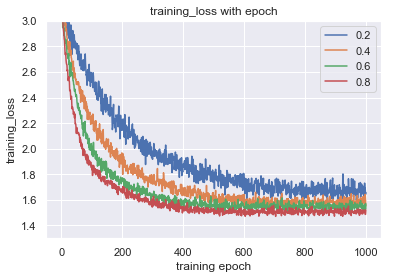

In [91]:
plotGraph(result_dict, 'training_loss')

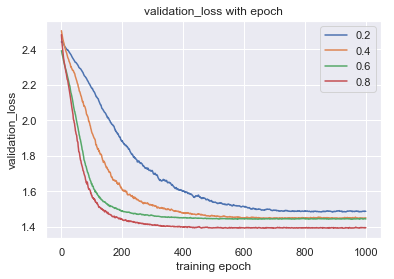

In [92]:
plotGraph(result_dict,'validation_loss')

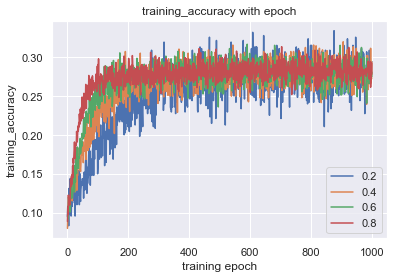

In [93]:
plotGraph(result_dict,'training_accuracy')

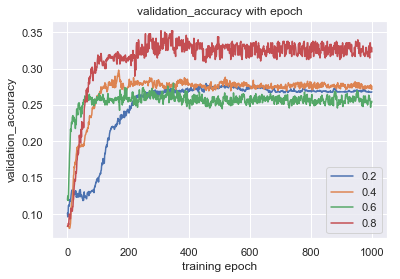

In [94]:
plotGraph(result_dict,'validation_accuracy')

In [95]:
predictions = model.predict(X_test[:3])

In [98]:
print(X_test[:3])

[[ 9 10 10 10  2]
 [ 1  2  1  1 10]
 [ 2  1  2  1 10]]


In [96]:
print(predictions)

[[1.0164449e-03 5.6355190e-04 1.2985802e-03 1.6995987e-03 2.3371377e-03
  6.9060992e-04 6.7557703e-04 3.1683937e-01 3.2818726e-01 3.4669185e-01]
 [3.3273590e-01 3.4033558e-01 3.2394716e-01 1.1744986e-04 4.2031982e-04
  2.4349525e-04 8.8910956e-04 3.9572589e-04 4.2244993e-04 4.9293495e-04]
 [3.3454481e-01 3.3960003e-01 3.2017317e-01 2.7095032e-04 8.9711277e-04
  5.3731370e-04 1.7536881e-03 6.6959014e-04 7.1617984e-04 8.3725870e-04]]
